# **Fundamentals of Data Science - Winter Semester 2022**


#### Leonardo Plini (TA), Luca Scofano (TA), Paolo Mandica (TA), and prof. Fabio Galasso
<plini.2000543@studenti.uniroma1.it> , <scofano@di.uniroma1.it>, <mandica@di.uniroma1.it>, <galasso@di.uniroma1.it>

## **#1 Homework: Image Filtering and Object Identification**

This first homework covers the main topics discussed in class.
Initially, you will be dealing with the original **Image Filtering** methods (*Question 1*), then you will have to work with **Edge Detection** algorithms (*Question 2*), and lastly, you are going to operate first-hand on **Object Identification** techniques (*Question 3*). 
Additionally, the homework will contain written questions and reports where you will be asked to write down your answer in Markdown language.
At the end of the homework there is an additional **Bonus Question** that can boost your score by **5 points**.

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOU TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary.*

As part of the homework, provide the answer to questions in this notebook report-like manner. After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors. We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

 **plini.2000543@studenti.uniroma1.it**, **mandica@di.uniroma1.it**, **scofano@di.uniroma1.it**, and **galasso@di.uniroma1.it** **by Thursday, October 20th, 23:59**.

-------------------------------------

**Outline and Scores for #1 Homework:**


* **Question 1: Image Filtering** *(9 points)*
  * **Question 1.0: Warm up**
  * **Question 1.1: 1D Filters**
  * **Question 1.2: 2D Filters**
  * **#1 Report**

* **Question 2: Edge Detection** *(9 points)*
  * **Question 2.1: Prewitt Operator**
  * **Question 2.2: Gradient Magnitude**
  * **Question 2.3: Laplacian Operator**
  * **Question 2.4: Canny Edge**
  * **Question 2.5: Laplacian Pyramid**

* **Question 3: Object Identification** *(12 points)*
  * **Question 3.1: Normalized Histograms**
  * **Question 3.2: Types of Histograms**
  * **Question 3.3: Image Retrival**
  * **Question 3.4: Closest Neighbours**
  * **#2 Report**

* **BONUS Question 4: Performance Evaluation** *(5 points)*


**TOTAL POINTS ARE 35, BONUS QUESTION INCLUDED**



## **Question 1: Image Filtering *(9 Points)***

*Recommended libraries to use:*

In [193]:
## import packages
import numpy as np
import pandas as pd
from PIL import Image
from scipy.signal import convolve2d as conv2, convolve
import matplotlib.pyplot as plt
import cv2
import math
from scipy import ndimage
import pandas as pd
import sklearn


plt.rcParams["figure.figsize"] = (20,8)

In [194]:
def rgb2gray(rgb):
  '''
  Converts RGB images to grayscale
  '''
  r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray
  

#### **Question 1.0: warm-up *(1/9 points)***

##### **Convolution**

Mathematically describe the convolution in the case of a 2D discrete image and illustrate its basic properties.

-------------------------------------------------------


**WRITE YOU ANSWER HERE**


-------------------------------------------------------

**Exercise on convolution  (display at least 2 computions explicitely):**
Write your answer in Markdown 

In general, to be consistent with the definition, we use zero padding: this practice consists in adding a border of pixels all with value zero around the edges of the input image.
In our case, we will have that

$$
\begin{equation}
f[m,n] = 
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 8 & 5 & 2 & 0 \\
0 & 7 & 5 & 3 & 0 \\
0 & 9 & 4 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}
*\begin{pmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{pmatrix}
=\begin{pmatrix}
... & ... & ... \\
... & 18 & ... \\
... & ... & ... \\
\end{pmatrix}
\end{equation}
$$



-------------------------------------------------------

In signal processing, Convolution operation consists in computing a linear combination between an input signal and a filter.
The filter is usually way smaller size than the input image. 
For this reason, in order to work on the entire input, filter is usually shifted around the entire input domain.

For illustration sake, Convolution formula seen in class will be used, which works perfectly fine in the Image Processing field.

$f[m, n] = \sum_{k, l} I[m - k, n - l] \times g[k, l]$

We will start by fixing the kernel indexes as: $k = [-1, 0, +1],\ l = [-1, 0, +1]$.

Once the indexing has been defined, the "conceptual" application basically consists in overlapping the patch of the input image with the kernel, mirrorred across both dimensions.
The mirrorring is due to having adopted the formula with the minus sign.
If the correlation formula, i.e. the one with the plus sign, was adopted, then we would not have any filter mirroring

We will assume a stride of $ 1 $ (natural slide)

This is the application of the filter on the top left patch, reported below:


\begin{pmatrix}
0 & 0 & 0\\
0 & 8 & 5 \\
7 & 5 & 3
\end{pmatrix}

$m = n = -1$


$f[-1, -1] =\hspace{0.3cm}\sum_{\substack{ -\le k \le +1 \\ -1 \le l \le +1} }I[-1 - k, -1 - l]\hspace{0.2cm} g[k, l] =$

$I[0,0]  g[-1,-1] +I[0,-1] g[-1,0] + I[0,-2] g[-1,1] + I[-1,0] g[0,-1] + $

$I[-1,-1] g[0,0] + I[-1,-2] g[0,1] + I[-2,0] g[1,-1] + I[-2,-1] g[1,0] + I[-2,-2] g[1,1] = $

$(5 \times -1) + (5 \times -1) + (0 \times -1) + (7 \times 0) + (8 \times 0) + (0 \times 0) + (0 \times 1) + (0 \times 1) + (0 \times 1) = -10 $

-------

This is the application of the filter on the first top  patch, reported below:
\begin{pmatrix}
0 & 0 & 0\\
8 & 5 & 2 \\
0 & 7 & 5
\end{pmatrix}

$ m =  0, n = -1 $

$f[0, -1] =\hspace{0.3cm}\sum_{\substack{ -\le k \le +1 \\ -1 \le l \le +1} }I[0 - k, -1 - l]\hspace{0.2cm} g[k, l] =$


$ I[+1,  0] \times g[-1, -1]\ + I[+1, -1] \times g[-1,  0] + I[+1, -2] \times g[-1, +1]\ +  $

$I[ 0,  0] \times g[ 0, -1]\ + I[ 0, -1] \times g[ 0,  0] + I[ 0, -2] \times g[ 0, +1]\ +  $

$I[-1,  0] \times g[+1, -1]\ +  I[-1, -1] \times g[+1,  0] + I[-1, -2] \times g[+1, +1]\ + = $ 

$ (3 \times -1) + (2 \times -1) + (0 \times  -1) +  (5 \times 0) +  (5 \times 0) + (0 \times 0) + $ 

$ (7 \times 1) +  (8 \times 1) + (0 \times 1) =  +10 $

--------



Reapiting the same procedure for each point, this is how the output will look like:

\begin{pmatrix}
-10 & 10 & 10\\
-14 & 18 & 14 \\
-9 & 12 & 9
\end{pmatrix}




-------------------------------------------------------

#### **Question 1.1: 1D Filters *(3/9 Points)*** 


##### **1-D Gaussian Filter**
Implement a method which computes the values of a 1-D Gaussian *Gx* for a given standard deviation $\sigma$ :
\begin{equation}
G=\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{x^2}{2\sigma^2})
\end{equation}

The method should also return a vector *x* of values on which the Gaussian filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

This should be the output with $\sigma=3$.



![](./images/1gauss.png)



In [195]:
def gauss(sigma):
  
  #Gauss function taking as argument the standard deviation sigma
  #The filter should be defined for all integer values x in the range [-3sigma,3sigma]
  #The function should return the Gaussian values Gx computed at the indexes x

  # Inizializing the vector x of values for the gaussian filter based on the given interval
  x = list(range(int(-3*sigma),int(3*sigma+1)))
  
  # Applying the formula for every values in the array x
  Gx = [
    (
      math.exp((-elem**2)/(2*sigma**2)))*(1/(math.sqrt(2*math.pi)*sigma)
    ) for elem in x
  ]

  # Returning computed values as NumPy array, for future compatibility
  Gx = np.asarray(Gx)
  
  return Gx, x

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

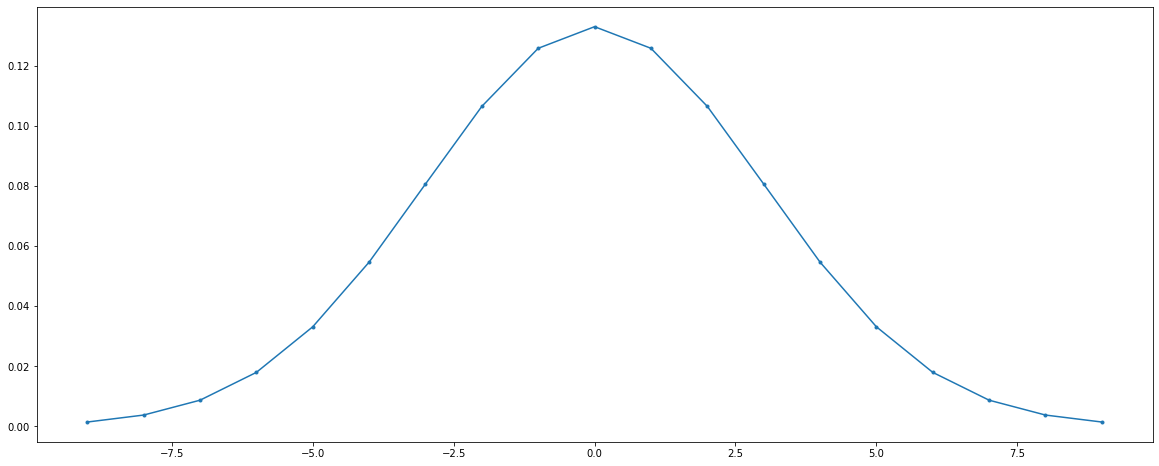

In [196]:
## function gauss
sigma = 3
Gx,x = gauss(sigma)
plt.figure(1)
plt.plot(x, Gx, '.-')
plt.show()

##### **1-D Box Filter**

Implement a method which computes the values of a 1-D Box *Bx* for a given standard deviation $\sigma$ :
\begin{equation}
B= [\frac{1}{n},\frac{1}{n},\dots,\frac{1}{n}]\in \mathbb{R}^n 
\end{equation}

The method should also return a vector *x* of values on which the **Box** filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

An example of Box Filter:

![](./images/1box.png)

In [197]:
def box(filter_size):
    """
    Box function taking as argument the filter size
    The filter should be defined for all integer values and centered in zero
    The function should return the Box values Bx computed at the indexes x
    """

    # Inizializing the vector x of values for the box function base on the given interval and its lenght as n
    x = list(range(int(-filter_size/2), int(filter_size/2+1)))
    
    # Applying the formula below for every values in the array x
    Bx=[ 1/filter_size for i in x ]
    
    return Bx, x

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

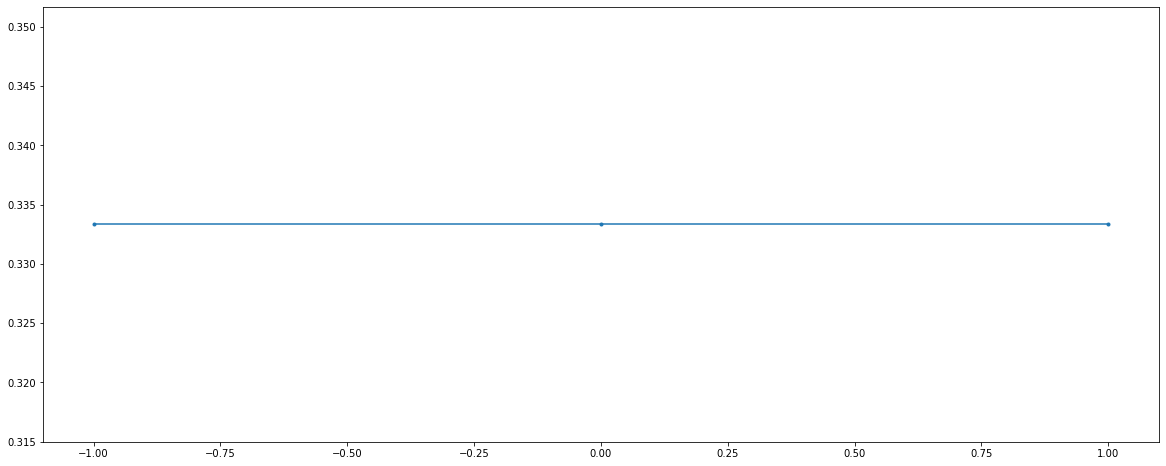

In [198]:
## function box
size = 3
Bx,x = box(size)
plt.figure(1)
plt.plot(x, Bx, '.-')
plt.show()

##### **1D Sharpening filter**

The sharpening linear filter should be defined for every value in the range [-3filter_size,3filter_size] on the integer values. The central value should be 1 and the values at the extremes should be -0.5. The values constantly increase from the first point up to the center and then they constantly decrease from the center up to the last point.
The method should return both a vector x of values on which the filter is defined and the transformed values Sx.

An example for filter_size=1:  
![](./images/1sharpening.png)

In [199]:
def sharpening(filter_size=3):
    """
    sharpening function taking as argument the filter size.
    The filter should be defined for all integer values and centered at zero
    The function should return the sharpened values Sx computed at the indexes x
    """
    
    x = list(range(int(-3*filter_size),int(3*filter_size)+1))
    
    # Knowing that the function in -3sigma is -0.5, in 3sigma is -0.5 and in 0 is 1, we computed two function, the first which
    # constantly increase and the second one which constantly decrease; finding the respectively functions Y = X/2sigma + 1 
    # for x in [-3sigma,0] and Y = -X/2sigma + 1 for x in [0,3sigma]
    
    Sx=[ (x[elem]/(2*filter_size)+1) for elem in range(0,int(len(x)/2)) ]
    
    Sx+=[ (-x[elem]/(2*filter_size)+1) for elem in range(int(len(x)/2),len(x)) ]

    return Sx, x

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

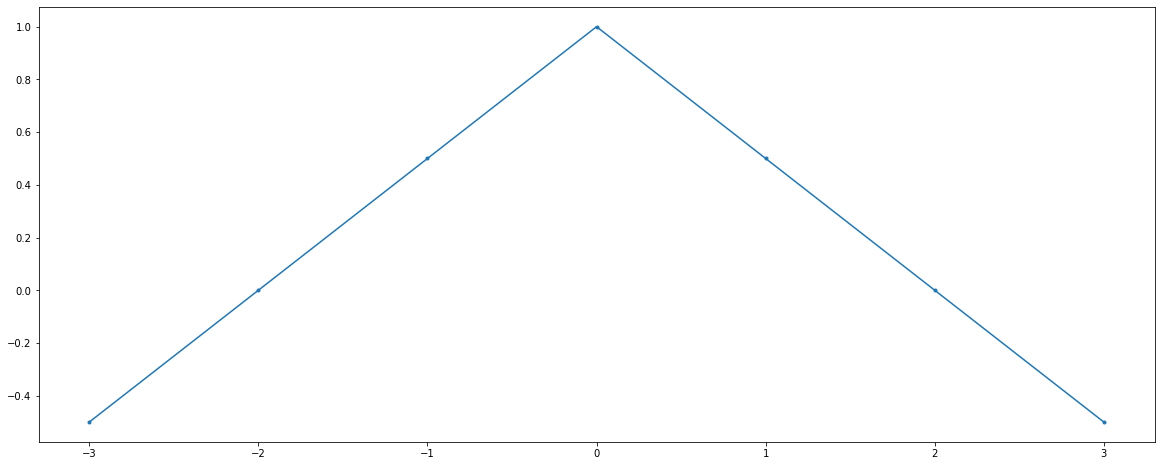

In [200]:
## function sharpening
filter_size = 1
Sx,x = sharpening(filter_size)
plt.figure(1)
plt.plot(x, Sx, '.-')
plt.show()

#### **Question 1.2: 2D Filters *(4/9 Points)***



##### **2-D Gaussian filter**
The function should take an image as an input
and return the result of convolution of this image with 2D Gaussian kernel. You can take advantage of the Python’s convolve2D function if you don’t want to
implement convolution yourself.

See figure below for illustration
of Gaussian filtering. 
![](./images/stella_gauss.jpg)



In [201]:
def gaussfiltering(img, sigma):
  """
  Implement a 2D Gaussian filter, leveraging the previous gauss.
  Implement the filter from scratch or leverage the convolve or convolve2D methods (scipy.signal)
  Leverage the separability of Gaussian filtering
  Input: image, sigma (standard deviation)
  Output: smoothed image
  """
  
  # Getting coefficients of a Gaussian distribution with sigma given as input
  # argument
  # Gx is basically going to be a 1D filter
  Gx, x = gauss(sigma) 

  # Adding one extra dimension to be compliant with the convolution method
  Gx = np.expand_dims(Gx, 1)

  # Convolving the image with the 1D Gaussian filter.
  # "mode" parameter has been set to "valid" in order to try to reproduce as
  # close as possible the sample images, provided in the textual cells of the 
  # notebook
  smooth_img = convolve(img, Gx, mode="valid") 

  # Convolving the image with the transposed 1D Gaussian filter.
  # "mode" parameter has been set to "valid" in order to try to reproduce as
  # close as possible the sample images, provided in the textual cells of the 
  # notebook
  smooth_img = convolve(smooth_img, np.transpose(Gx), mode="valid")

  # The two convolve calls are enforcing separability, as requested in the method
  # documentation.
  # As per theory seen in class, separability allows us apply an n-dimensional 
  # operator by means of applying its 1D version n-times.
  # This yields to computational efficiency
  
  return smooth_img

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

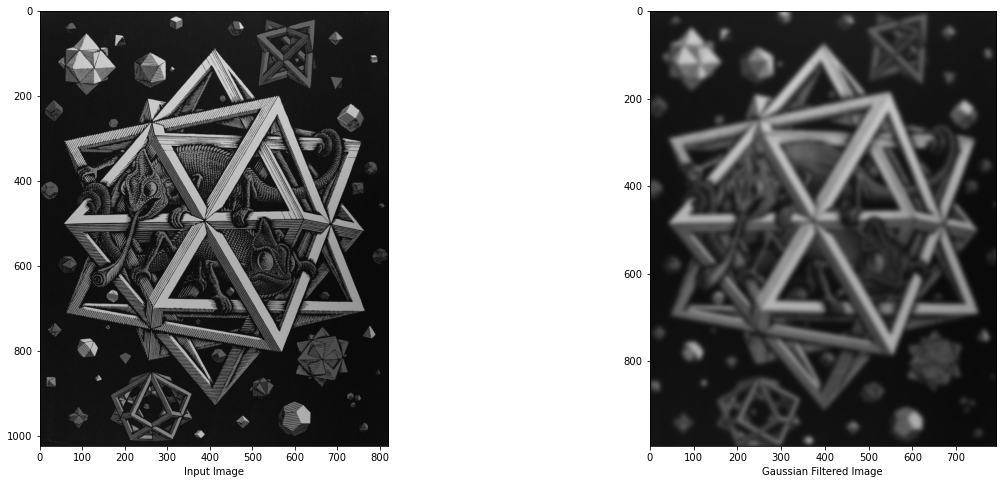

In [202]:
img = rgb2gray(np.array(Image.open('images/stella.jpg')))
smooth_img = gaussfiltering(img, 5)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gaussian Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **2-D Box filter**
The function should take an image as an input
and return the result of convolution of this image with 2D Box kernel. 

See figure below for illustration of Box filtering.

![Original Image](./images/box_image.jpg)



In [203]:
def boxfiltering(img, filter_size):
  """
  Implement a 2D Box filter, leveraging the previous box.
  Leverage the separability of Box filtering
  Input: image, filter_size
  Output: smoothed image
  """
  
  # Getting a 1D box filter of size specificied in the input parameters
  Bx, x = box(filter_size)

  # Adding an empty dimension for compatibility with the convolve method
  # This time, the dimension has been added at the end of the NDarray, 
  # making this filter a column vector.
  # We will filter first along the y-dimension, then across the x-dimension.
  # End result will not change, as seen in class (convolution is commutative).
  Bx = np.expand_dims(Bx, 1)

  # Convolving the input image with the 1D box filter
  smooth_img = convolve(img, Bx)

  # Convolving the input image with the transposed 1D box filter
  smooth_img = convolve(smooth_img, np.transpose(Bx))

  # The two convolve calls are enforcing separability, as requested in the method
  # documentation.
  # As per theory seen in class, separability allows us apply an n-dimensional 
  # operator by means of applying its 1D version n-times.
  # This yields to computational efficiency

  return np.array(smooth_img)

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

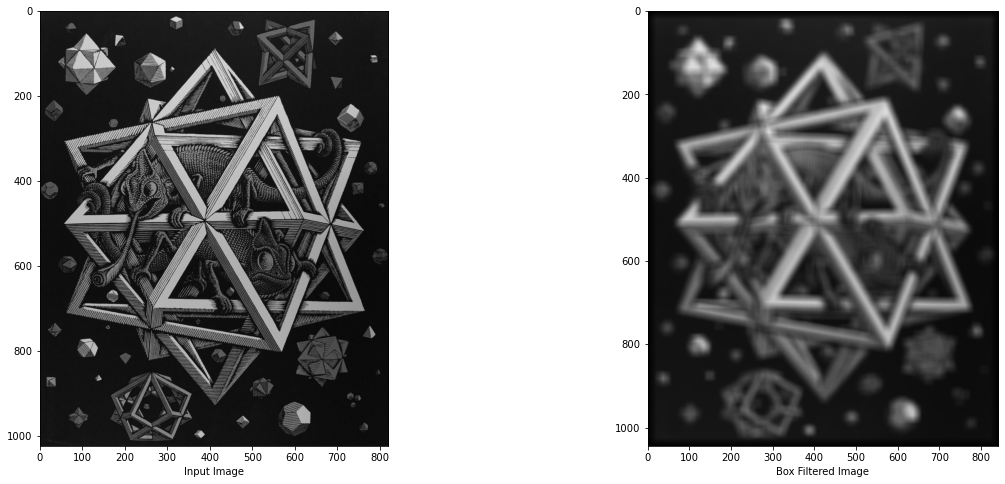

In [204]:
img = rgb2gray(np.array(Image.open('images/stella.jpg')))
smooth_img = boxfiltering(img, 20)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Box Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()


##### **Separability and computational efficiency**

Illustrate analytically what does it mean that a Gaussian filter is separable

-------------------------------------------------------


-------------------------------------------------------


Suppose to have an $n$-dimensional filter, $ F $, that we want to apply to an input image $ I $, by means of convoling $I$ and $F$. <br>
For practicality, set $ n = 2 $.

Separability is the property that allows us to treat the application of $ F $ to $I$ as $n$ applications of the 1-dimensional version of $F$, yielding to the same, equivalent result.

Let's switch to formalizations and formulas.
We want to compute as follows: $ I \circledast F$;

$F$ is $2$-dimensional and, by separability assumption, it can be decomposed in $2$ 1D components, $F_x$ and $F_y$, which we can then use as explained above:

$ I \circledast F = (F_x \circledast F_y) \circledast I = F_x \circledast (F_y \circledast I)$ 

Notice the usage of the associativity property, which can be used because convolution is a linear operator.<br>
Without associativity property, we'd basically get back to the original F.
This way, instead, we are first convolving the I with the 1D filter $F_y$, then the result is convolved with the other 1D filter, $F_x$.

All of the above comes in handy when considering computational complexity of filtering, which is expanded in the upcoming Notebook cell.


-------------------------------------------------------


-------------------------------------------------------

Briefly explain why it is more convenient computationally speaking to use two 1D Gaussian filters rather than one 2D Gaussian filter. 
Assume that the dimension of the 2D Gaussian filter is $k^2$ and that the dimension of the two 1D Gaussian filters is $k$.

-------------------------------------------------------

Expanding upon what has been written in the previous cell, let us define the function $ C : I, F \to R $, which returns the cost of applying the filter $F$ to the image $I$.<br>
For example, as seen in class, C could count the number of operations needed to convolve $I$ with $F$. <br>
Numerically speaking, supposing:
- $I \in R^{n \times n}$
- $ F \in R^{k \times k} $
- no padding
- natural stride

$ C(I, F) = k \times k \times (n - k + 1) \times (n - k + 1) = k^4 − 2k^3 +k^2 + n^2 $<br>
In fact, we have to compute $k^2$ products for the convolution, which is then repeated $(n - k + 1)^2$ times ($(n - k + 1)$ times for each of the $(n - k + 1)$ rows)

Suppose now the same image and filter, only now leveraging separability. This would translate in:
- $I \in R^{7 \times 7}$
- $ F_x \in R^{3} $ ($3$ is basically the $k$ variable written in the description!)
- no padding
- natural stride

$ C(I, F_x) = k \times (n - k + 1) \times (n) = kn − k^2n + kn^2 $<br>
In fact, we have to compute $k$ products for the convolution, which is then repeated $(n - k + 1) \times n$ times ($(n - k + 1)$ for each of the $n$ rows)

$ C(I, F_y) = k \times n \times (n - k + 1) = kn − k^2n + kn^2 $ 

Comparing the asymptotic cost of using and not using the separability, we can see the convenince of leveraging separability:<br>
$ C(I, F_x) + C(I, F_y) = 2(kn − k^2n + kn^2) < k^4 − 2k^3 +k^2 + n^2 = C(I, F) $<br>
Basically, using separability, we get a cost that is quadratic in the filter size.
Without separability, we end up with a complexity that is quartic in the size of the filter.


-------------------------------------------------------

##### **Practical example of separability**

Previously, in the section "2-D Gaussian filter", you have implemented a 2D Gaussian filter using the separability property. In this section, you should implement another time the 2D Gaussian filter without using the separability.
Compare the images to check that the separability property is valid.

In [205]:
def gaussfiltering2(img, sigma):
  """
  Implement a 2D Gaussian filter, leveraging the previous gauss.
  Implement the filter from scratch or leverage the convolve2D method (scipy.signal)
  Do NOT leverage the separability of Gaussian filtering
  Input: image, sigma (standard deviation)
  Output: smoothed image
  """
  # Getting a 1D dimensional Gaussian filter
  Gx, x = gauss(sigma) 

  # Assemblying two 1D Gaussian filters into a 2D Gaussian filter, using the 
  # dot product rule seen in class
  Gx = np.multiply.outer(Gx, np.transpose(Gx))

  # Applying the 2D convolution, using the assembled 2D filter.
  # This call is NOT using separability because we are applying the filter in all of its dimensions.
  # If we had separability, we would have applied two distinct 1D filters. 
  smooth_img=conv2(img, Gx, mode="valid") 

  return smooth_img

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

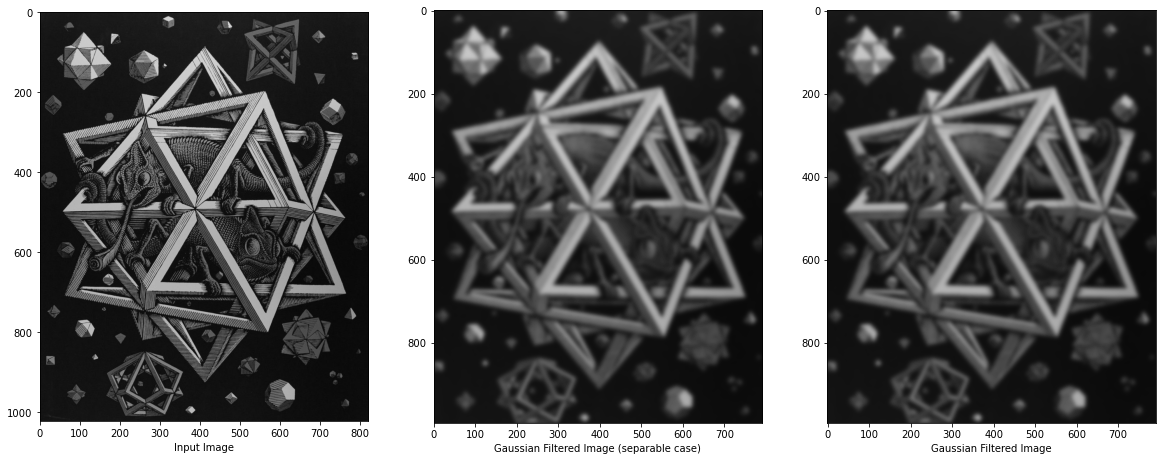

In [206]:
img = rgb2gray(np.array(Image.open('images/stella.jpg')))
smooth_img = gaussfiltering(img, 5)
smooth_img2 = gaussfiltering2(img, 5)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('Gaussian Filtered Image (separable case)')
ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('Gaussian Filtered Image')


plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax3)
plt.imshow(smooth_img2, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **Sharpening Filter**

Consider the first part of the reading at the folllowing link to implement a simple 2D Sharpening filter **using a Gaussian Kernel** defined before with $\sigma=5$:

* https://web.stanford.edu/class/cs448f/lectures/2.1/Sharpening.pdf

See figure below for illustration of the sharpening filter:
![Original Image](./images/sharpened.jpg)



In [207]:
def sharpening(img):
  """
  Implement a 2D Sharpening filter using a Gaussian Kernel with , leveraging the previous gauss.
  Input: image
  Output: sharpened image
  """

  # Setting Sigma to 5 as per exercise request
  sigma = 5

  # Getting a 1D Gaussian filter
  Gx, x = gauss(sigma)

  # Adding an empty dimension for compatibility with the convolve method
  Gx = np.expand_dims(Gx, 1)

  # Using the formula in slide 8/47 of the linked slides
  # Step 1: producing a coarse representation, by means of applying a Gaussian
  #         smoothing filter (enforcing separability)
  coarse = convolve(img, Gx, mode="same")
  coarse = convolve(coarse, np.transpose(Gx), mode="same")

  # Step 2: producing a finer representation, in a similar way to the i-th step
  #         in the Gaussian Pyramid
  # fine = img - coarse

  # Step 3: producing the final outpt
  # output = img + fine * 0.5

  # Step 2, alternative version
  # Steps 2 and 3 can be gathered together, enforcing some algebraic properties 
  # and linearity of convolution.
  # This is the end result
  output = 3/2 * img - 1/2 * coarse
  
  return output

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

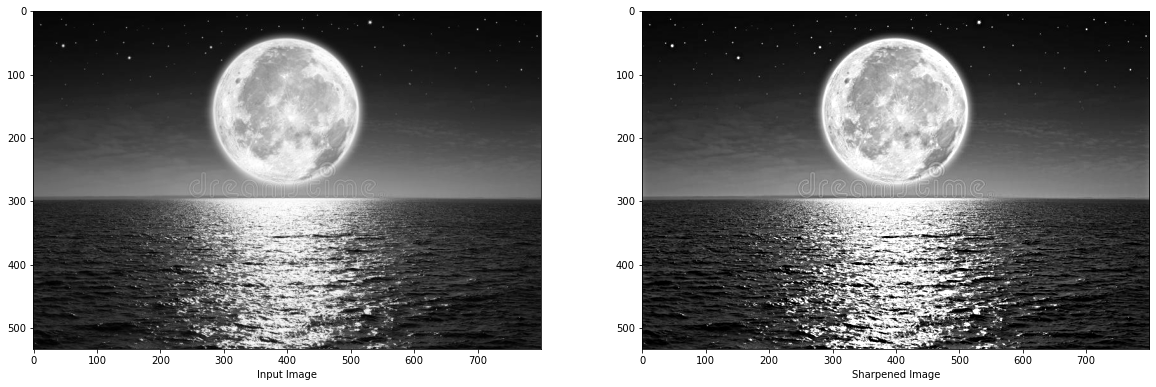

In [208]:
img = rgb2gray(np.array(Image.open('images/moon.jpg')))
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Sharpened Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(sharpening(img), cmap='gray', vmin=0, vmax=255)
plt.show()

### **#1 Report *(1/9 Points)***

Use the images from the previous exercises to write a report on what you learned about filters and convolutions **(in the text block below)**.
* Ex 1: discuss the effect of sigma when using the gaussian filter
* Ex 2: write the filter that was used to produce the images


![](./images/ex1report1.png)

--------------------------------------------

In this first section of the Notebook, we started by defining the **Convolution** operator.
After manually computing some iteration of a convolution between a hypothetical input an a dummy filter, we started to look at different kind of **filters**.

The first filter we produced and experimented with has been a **1D Gaussian** filter.
Convolving this Gaussian filter with the given image offered us the opportunity to **experiment** with two concepts seen in class:
- **Separability** 
- **Smoothing strength**

As far as separability is concerned, we tested its claim in practice: convolving the image with the 2D Gaussian filter and convolving the image with the 1D Gaussian filters (one conv for each direction) yields to the **same** exact **result**, but at a fraction of the execution time.<br>
Furthermore, experimenting while coding the requested methods, offered us the opportunity to test in practice:
- how to **compose** a 2D filter, starting from its 1D version (with the dot product rule, seen in class).
- the **invariance** of separability, **w.r.t.** the **order** of the **directions** in which the filter is applied (convolving first along the x direction, then across the y axis or vice versa does not change the final output)

Regarding smoothing strength, we tried different **Sigma** values, taking note of the result on the final output.<br>
As expected, the **higher** the Sigma, the higher the smoothing effect and the **execution time**, since a higher number of pixels will contribute to the 68% filtering power.<br>
From a smoothing perspective, this means that a single pixel will be the result of a Gaussian average of more values.<br>
From a computational perspectinve, this translates in **more multiplications** that must be performed.

As far as sharpening is concerned, we first started by **repeating** the same technical tests showcased above (separability, its invariance and its performances).<br>
Then, we noticed that using linearity of the convolution, the proposed formulation could be **simplified** into a more **compact** formula, which we we tested against the original.<br>
Both results were **equal**, as expected. See the comments in the code for more details about the simplification.

--------------------------------------------

![](./images/ex2report1.png)

![](https://drive.google.com/uc?export=view&id=1rsJ7nYMoZ_O6doGhbArYtgMG1aVlI7AO)

--------------------------------------------

Looking at the pictures, this are the filter that have been applied to produce the outputs, starting from the input:

- Image A filter -> Gaussian blur with smaller Sigma than filter used on Image B
- Image B filter -> Gaussian blur with bigger Sigma than filter used on Image A
- Image C filter -> Sharpening filter


The difference in Sigma between the filters applied on Image A and Image B can be inferred by looking at the different amounts of blur that is present in the two outputs. <br>
As per class lectures, the bigger the Sigma the stronger the amount of blur, due to the fact that the majority (68%) of filtering power is given to a larger "pool" of neighbouring pixels

--------------------------------------------

## **Question 2: Edge Detection** *(9 Points)*

Edges represents the object boundaries. So edge detection is a very important preprocessing step for any object detection or recognition process. Simple edge detection kernels are based on approximation of gradient images.

Now you are going to use some basic edge detection kernels.





#### **Question 2.1: Prewitt operator** *(1/9 Points)*


The Prewitt operator is used in image processing, particularly within edge detection algorithms. Technically, it is a discrete differentiation operator, computing an approximation of the gradient of the image intensity function.

See figure below for illustration of the prewitt operators in action:
![Original Image](./images/prewitt.jpg)



In [209]:
def prewitt_x(img):
  """
  Implement a 3x3 Prewitt discrete operator for vertical edges
  Input: image
  Output: image with vertical edges
  """
  
  # Using this to flip the filter
  # When set to -1, filter sign is switched
  # When set to  1, filter sign is NOT switched
  SIGN_FLIP = -1

  # Defining the vertical Prewitt operator, using this formulation
  # https://en.wikipedia.org/wiki/Prewitt_operator#Formulation, which is basically
  # the flipped version of the first order derivative 2D edge detection filter 
  # seen in class
  vertical_filter = np.array(
    [
      [-1, 0, 1],
      [-1, 0, 1],
      [-1, 0, 1]
    ]
  ) * SIGN_FLIP
  
  # Convolving the image with the edge detection filter
  Fx = conv2(img, vertical_filter)

  return Fx

In [210]:
def prewitt_y(img):
  """
  Implement a 3x3 Prewitt discrete operator for  horizontal edges
  Input: image
  Output: image with  horizontal edges
  """

  # Using this to flip the filter
  # When set to -1, filter sign is switched
  # When set to  1, filter sign is NOT switched
  SIGN_FLIP = -1
  
  # Defining the horizontal Prewitt operator, using this formulation
  # https://en.wikipedia.org/wiki/Prewitt_operator#Formulation, which is basically
  # the flipped version of the first order derivative 2D edge detection filter 
  # seen in class
  horizontal_filter = np.array(
    [
      [-1, -1, -1],
      [ 0,  0,  0],
      [ 1,  1,  1]
    ]
  ) * SIGN_FLIP

  # Convolving the image with the edge detection filter
  Fy = conv2(img, horizontal_filter)

  return Fy

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

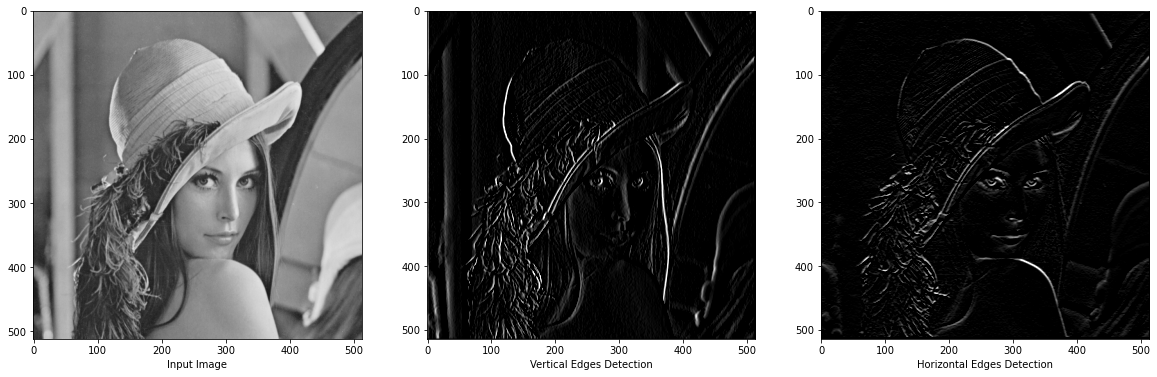

In [211]:
plt.figure(2)
img = rgb2gray(np.array(Image.open('images/lenna.jpg')))

ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('Vertical Edges Detection')
ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('Horizontal Edges Detection')

plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(prewitt_x(img), cmap='gray', vmin=0, vmax=255)
plt.sca(ax3)
plt.imshow(prewitt_y(img), cmap='gray', vmin=0, vmax=255)
plt.show()

#### **Question 2.2: Gradient Magnitude** *(1/9 Points)*
Using the previously defined functions prewitt_x and prewitt_y, retrieve the gradient magnitude of the image.

See figure below for illustration of the Gradient Magnitude:
![Original Image](./images/gradient_magnitude.jpg)




In [212]:
def gradient_magnitude(img):
  """
  Input: image
  Output: gradient magnitude
  """

  # multi-dimensional L_2 norm/distance between the images storing vertical and 
  # horizontal edges 
  return np.sqrt(prewitt_x(img)**2 + prewitt_y(img)**2)



--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

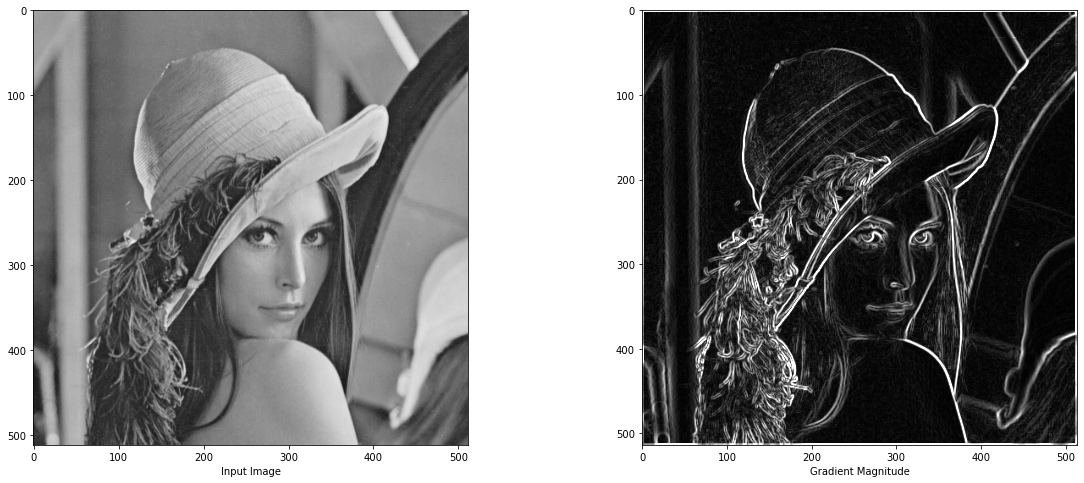

In [213]:
img = rgb2gray(np.array(Image.open('images/lenna.jpg')))

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gradient Magnitude')


plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(gradient_magnitude(img), cmap='gray', vmin=0, vmax=255)
plt.show()


#### **Question 2.3 Laplacian operator** *(2/9 Points)*
It is an approximation of second order derivative that defines zero crossing. In this section, we are interested in a  discrete laplacian operator.



See figure below for illustration of the discrete Laplacian:
![Original Image](./images/laplacian.png)



In [214]:
def discrete_laplace(img, conv_mode="full", boundary="fill"):
  """
  Input: image
  Output: image after applying the Laplacian operator
  """

  # Debug switch to decide what "version to use".
  # USE_LINEARITY_OF_CONVOLUTION = True  --> Applies one convolution, using as 
  #                                          filter a linear combination of the 
  #                                          two filters 
  # USE_LINEARITY_OF_CONVOLUTION = False --> applies the two filters via two 
  #                                          separate convolutions
  USE_LINEARITY_OF_CONVOLUTION = True

  # Defining the 2D Laplacian filter along the x-axis, following the 2nd order
  # 1D derivative formulation seen in class 
  laplacian_2d_x = np.array(
    [
      [0,  0,  0],
      [1, -2,  1],
      [0,  0,  0]
    ]
  )
  # the top and bottom 0-values rows are needed to use the 1D filter in the 2D
  # domain.

  # The Laplacian along the y-direction is the transposed of the Laplacian 
  # across the x-axis 
  laplacian_2d_y = np.transpose(laplacian_2d_x)

  # Thanks to linearity of the convolution, applying the two convolutions with 
  # the laplacian_2d_x and laplacian_2d_y filters is the same as convolving 
  # with the sum of the two filters
  laplacian_2d = laplacian_2d_x + laplacian_2d_y

  if USE_LINEARITY_OF_CONVOLUTION:
    return conv2(img, laplacian_2d, mode = conv_mode)
  else: 
    # The Laplacian of a 2D image is the sum of the Laplacians along the two 
    # directions, x and y
    return conv2(
      img, laplacian_2d_x, mode = conv_mode
    ) + conv2(img, laplacian_2d_y, mode = conv_mode)

  

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

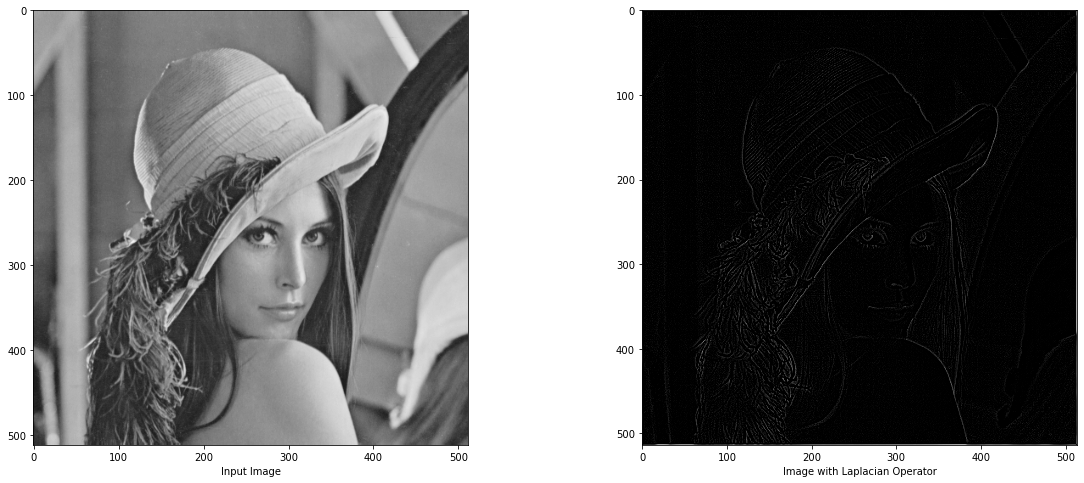

In [215]:
img = rgb2gray(np.array(Image.open('images/lenna.jpg')))

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Image with Laplacian Operator')
plt.sca(ax1)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(discrete_laplace(img), cmap='gray', vmin=0, vmax=255)
plt.show()

#### **Question: 2.4 Canny Edge detector** *(3/9 Points)*
The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. 

The Canny edge detection algorithm is composed of 5 steps:

1. Noise reduction: apply Gaussian filter to smooth the image in order to remove the noise
2. Gradient calculation: find the intensity gradients of the image
3. Non-maximum suppression: apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection
4. Double threshold: apply double threshold to determine potential edges
5. Edge Tracking by Hysteresis: track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.


##### **Stage 1**
Noise reduction: apply Gaussian filter to smooth the image in order to remove the noise. You can use the function gauss_filtering defined above with sigma=3.



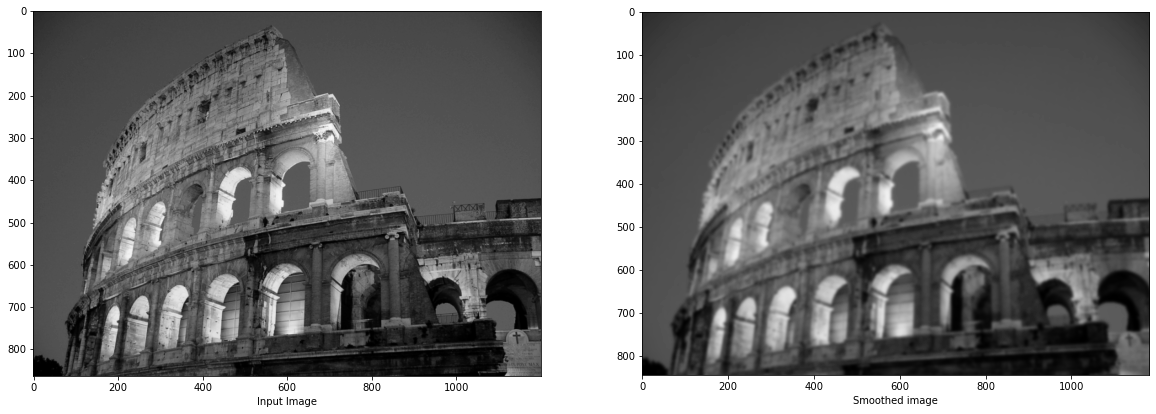

In [216]:
# STEP 1: 

img = rgb2gray(np.array(Image.open('images/colosseum.jpg')))
# Applying some smoothing to the input image, using the devised method from above
smoothed_img=gaussfiltering(img, 3)

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Smoothed image')
plt.sca(ax1)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smoothed_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **Stage 2**
The Gradient calculation step detects the edge intensity and direction by calculating the gradient of the image using edge detection operators.

Edges correspond to a change of pixels’ intensity. To detect it, the easiest way is to apply filters that highlight this intensity change in both directions: horizontal (x) and vertical (y)

When the image is smoothed, the derivatives Ix and Iy w.r.t. x and y are calculated. It can be implemented by convolving I with Sobel kernels Kx and Ky, respectively:

Our output should be the magnitude G and the slope θ of the gradient.
See figure below for the illustration of the gradient magnitude:

![Original Image](./images/CED_step2.jpg)


In [217]:
# #STEP 2

def sobel_filters(img):
    
    # Defining the 2D Sobel filter along the x-direction, according to this
    # formulation: https://en.wikipedia.org/wiki/Sobel_operator#Formulation
    sobel_filter_2d_x = np.array(
        [
            [-1, 0, 1], 
            [-2, 0, 2], 
            [-1, 0, 1]
        ]
    )

    # Looking at the formalization on Wikipedia, the filter in y-direction is 
    # the transposed of the filter in the x-direction, with a flipped sign
    sobel_filter_2d_y = np.transpose(sobel_filter_2d_x) * -1
    
    # Applying the filter along both directions
    sobel_edges_x = convolve(img, sobel_filter_2d_x)
    sobel_edges_y = convolve(img, sobel_filter_2d_y)
    
    # Computing the gradient as the L_2 norm between the edges in the x-direction
    # and the edges in the other direction
    G = np.sqrt(sobel_edges_x ** 2 + sobel_edges_y ** 2)
    
    # Coumputing the angle as the arctangent, as seen in class
    # arctan2 yields to a slightly less noisier output, which is closer to the 
    # example one posted in the Notebook.
    # For this reason, arctan2 call is kept, instead of the arctan one
    # theta = np.arctan(Iy, Ix)
    theta = np.arctan2(sobel_edges_y, sobel_edges_x)
    
    return (G, theta)

In [218]:
#SOLUTION
#STEP 2

# def sobel_filters(img):
#     Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
#     Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
#     Ix = ndimage.filters.convolve(img, Kx)
#     Iy = ndimage.filters.convolve(img, Ky)
    
#     G = np.hypot(Ix, Iy)
#     #G = G / G.max() * 255
#     theta = np.arctan2(Iy, Ix)
    
#     return (G, theta)

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

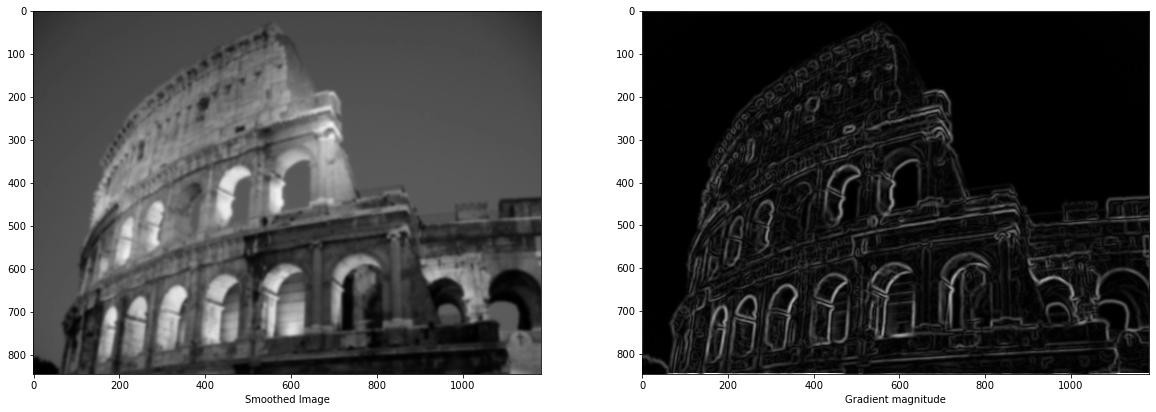

In [219]:
G,theta=sobel_filters(smoothed_img)

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Smoothed Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gradient magnitude')
plt.sca(ax1)

plt.imshow(smoothed_img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **Stage 3** 
Non Maximum Suppression: the image is scanned along the image gradient direction, and if pixels are not part of the local maxima they are set to zero. This has the effect of supressing all image information that is not part of local maxima.

You just need to run the code for stage 3

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [220]:
# STEP 3
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

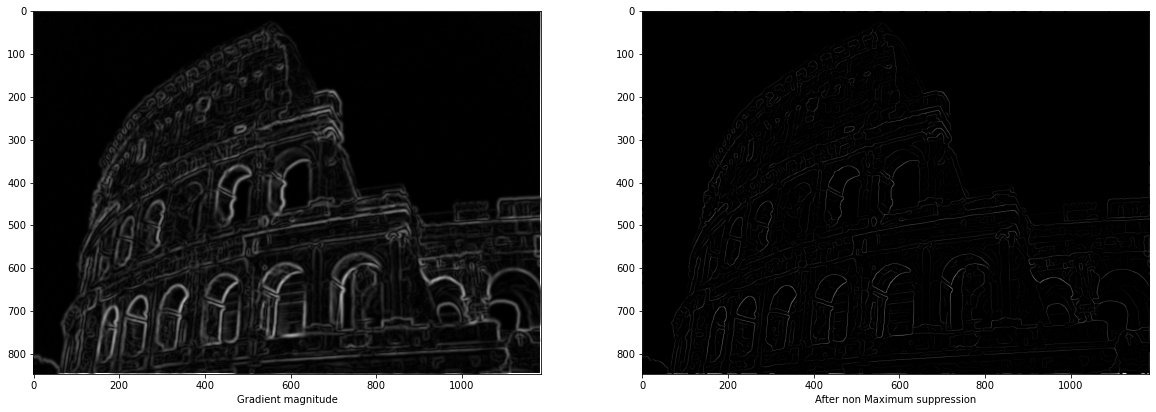

In [221]:
G,theta=sobel_filters(smoothed_img)
Z=non_max_suppression(G, theta)

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Gradient magnitude')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('After non Maximum suppression')
plt.sca(ax1)

plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(Z, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **Stage 4**
After application of non-maximum suppression, remaining edge pixels provide a more accurate representation of real edges in an image. However, some edge pixels remain that are caused by noise and color variation. To account for these spurious responses, it is essential to filter out edge pixels with a weak gradient value and preserve edge pixels with a high gradient value. This is accomplished by selecting high and low threshold values. If an edge pixel’s gradient value is higher than the high threshold value, it is marked as a strong edge pixel. If an edge pixel’s gradient value is smaller than the high threshold value and larger than the low threshold value, it is marked as a weak edge pixel. If an edge pixel's gradient value is smaller than the low threshold value, it will be suppressed.

You just need to run the code for stage 4

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [222]:
# STEP 4
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

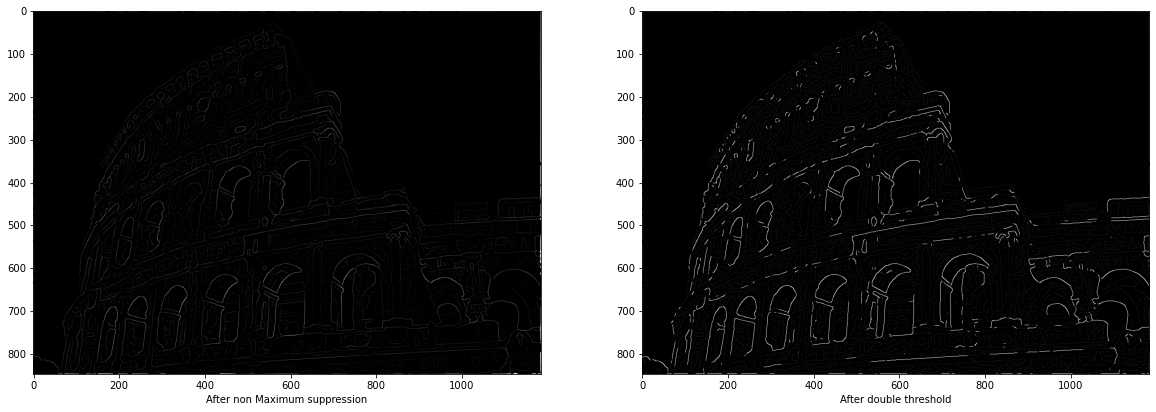

In [223]:
Z=non_max_suppression(G, theta)
res, weak, strong=threshold(Z, lowThresholdRatio=0.05, highThresholdRatio=0.09)
    

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('After non Maximum suppression')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('After double threshold')
plt.sca(ax1)

plt.imshow(Z, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(res, cmap='gray', vmin=0, vmax=255)
plt.show()

##### **Stage 5**
Based on the threshold results, the hysteresis consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one.

See figure below for the illustration of the final result:
![Original Image](./images/CED_step5.jpg)



In [248]:
# STEP 5

def hysteresis(img, weak=25, strong=255):

    # TODO not sure if it's correct!
    
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                # print(i, j)
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img


--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

[ 26 550]
[ 26 555]


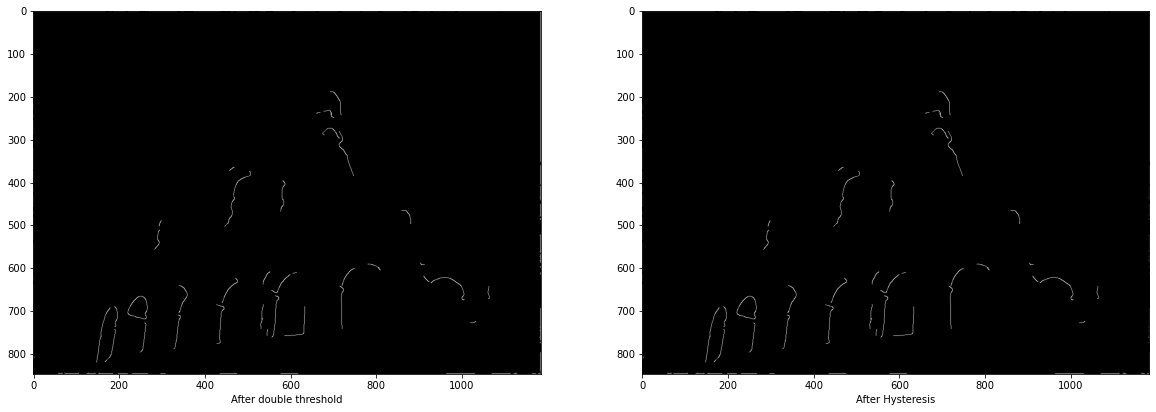

In [249]:
res, weak, strong=threshold(Z, lowThresholdRatio=0.1, highThresholdRatio=0.2)
final_img=hysteresis(res, weak, strong=255)

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('After double threshold')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('After Hysteresis')
plt.sca(ax1)

plt.imshow(res, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(final_img, cmap='gray', vmin=0, vmax=255)
plt.show()

#### **Question: 2.5 Laplacian Pyramids** *(2/9 Points)*

Implement a Laplacian Pyramid: 
- Write a function for downscaling (you can use [`skimage.transform.resize`](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.resize))
- Write a function for the Laplacian Pyramid consisting of the following steps: 
    1. **Downscale** the image by the input factor
    2. **Apply Gaussian filter** on the Image to obtain a smoothed image
    3. **Apply Laplacian filter** on the smoothed image to obtain edges (you can use [`scipy.ndimage.laplace`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.laplace.html))
    4. **Plot** the 3 images side by side
    4. **Repeat** previous steps with the resized smoothed version of the image

See figure below for an illlustration of Laplacian Pyramid.
![](./images/laplacian_pyramid.png)

In [250]:
from skimage.transform import resize

def downscale(img, factor):
    '''
    This function should return the given image
    resized by the factor.
    Input:
    img: the image to resize
    factor: the factor you want use to downscale
    Output:
    resized: the resized image
    '''
    
    # Resizing the image so as a downscaling happens, according to the requested
    # downscaling factor
    return resize(img, np.array(img.shape) * factor)

In [36]:
# from turtle import down
from scipy.ndimage import laplace

def LaplacianPyramid(img, steps=3, factor=0.5, sigma=4):
    '''
    This function implements the Laplacian Pyramid and shows the results.
    Leverage the "downscale" function.
    
    Inputs:
        img: the image
        steps: number of steps for the Pyramid
        factor: the scaling factor to resize the image at each step
        sigma: the Gaussian filter parameter
    '''

    # Copying the image, just in case :)
    downscaled = img.copy()

    # Repeating for as many steps as requested
    for step in range(0, steps):
        
        # Producing a downscaled version of the image
        downscaled = downscale(downscaled, factor)
        
        # Smoothing the image
        smoothed = gaussfiltering2(downscaled, sigma)

        # Applying the Laplacian operator to the smoothed image
        after_laplacian = laplace(smoothed)
        
        # Creating the plotting space, and adapt it to visually create the 
        # "Laplacian Pyramid"
        ax1, axarr = plt.subplots(1, 3)
        ax1.set_figwidth(downscaled.shape[0]/45)
        ax1.subplots_adjust(wspace=0.4)

        # Plotting downscaled version
        axarr[0].imshow(downscaled, cmap='gray', vmin=0, vmax=255)
        
        # Plotting smoothed version
        axarr[1].imshow(smoothed, cmap='gray', vmin=0, vmax=255)
        
        # Plot "after_laplacian", after normalization
        temp = after_laplacian - after_laplacian.min()
        temp = temp * (255.0/temp.max())
        axarr[2].imshow(temp, cmap='gray', vmin=0, vmax=255)

        # To start next iteration from the smoothed image
        downscaled = smoothed
        
        plt.show()

**TODO:** explain how the Laplacian Filter works

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

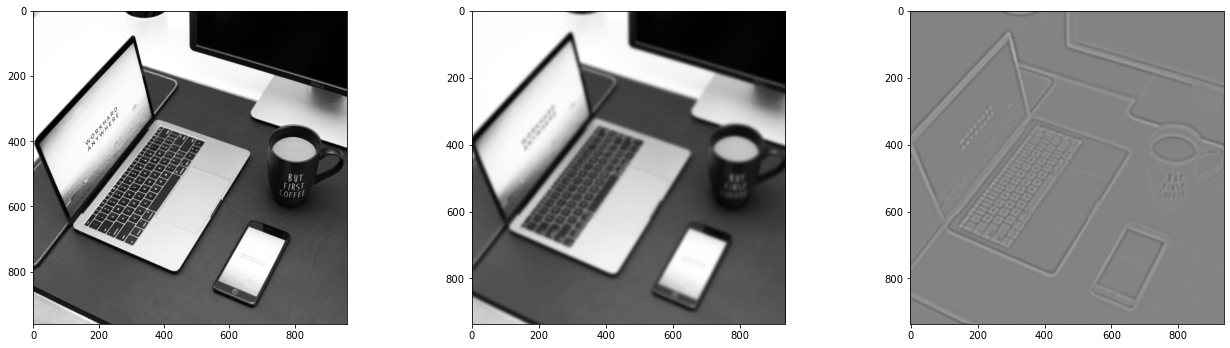

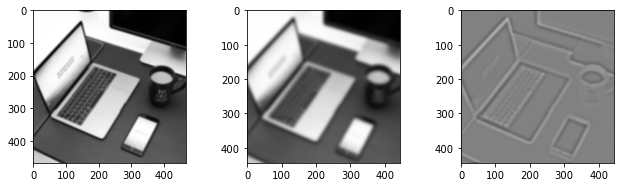

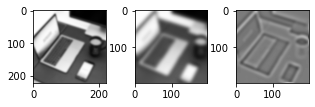

In [251]:
img = rgb2gray(np.array(Image.open('images/coffee.jpg')))
LaplacianPyramid(img, steps=3, factor=0.5, sigma=4)


## **Question 3: Object Identification** *(12 Points)*

*Note: This identification part contains **query and model images** for the evaluation, which correspond to the same set of objects photographed from different viewpoints. The files **model.txt** and **query.txt** contain lists of image files arranged so that i-th model image depicts the same object as i-th query image. *

Import some useful libraries

In [252]:
## import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist
import matplotlib.pyplot as plt

In [253]:
def rgb2gray(rgb):
  r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

#### **Question 3.1: Normalized Histogram** *(2/12 Points)*
This exercise aims to implement the stated function **normalized hist**. Such a function takes as input a grey-value image and returns a normalized histogram of pixel intensities. 

*Note: consider that pixel intensities range from $0$ to $255$ when quantizing the image to compute the histogram.*

Once you have implemented your version of the function, you should compare it to the built-in Python function **numpy.histogram**.

*Note: The histograms returned from your function should be approximately the same as the one that gets returned from Numpy's implementation*

In [256]:
def normalized_hist(img_gray, num_bins = 40):
  #Compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
  #assume that image intensity is between 0 and 255

  #img_gray - input image in grayscale format
  #num_bins - number of bins in the histogram
  
  # Getting input shape
  x, y = np.shape(img_gray)

  # Copying input image in a temp Tensor, just in case
  img_r_g = img_gray.copy()

  # Computing the number of the bin in which every grey-scale element will fall
  # into, using this formula https://stats.stackexchange.com/questions/236205/programmatically-calculate-which-bin-a-value-will-fall-into-for-a-histogram
  img_unadjusted_bins = (num_bins * (img_r_g - 0)) / (254 - 0)
  
  # The combination of the np.clip and np.ceil methods is needed to handle one
  # particular edge case
  img_adjusted_bins = np.clip(
      np.ceil(img_unadjusted_bins) - 1, 0, num_bins - 1
  ).astype(int)

  # To store the actual histogram
  count_manual = np.zeros((num_bins), dtype=int)

  # Populating the 1D the histogram
  for l1 in range(0, x):
      
      for l2 in range(0, y):
        
        # Getting the ID of the bin in which the current pixel should go in
        bin_number_x = img_adjusted_bins[l1, l2]
        
        # Increasing the count of bin ID got in previous instruction
        count_manual[bin_number_x] += 1
  
  # Returning the normalized hist and the set of the bins 
  return (count_manual / count_manual.sum()), np.linspace(0, 255, num_bins + 1)

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

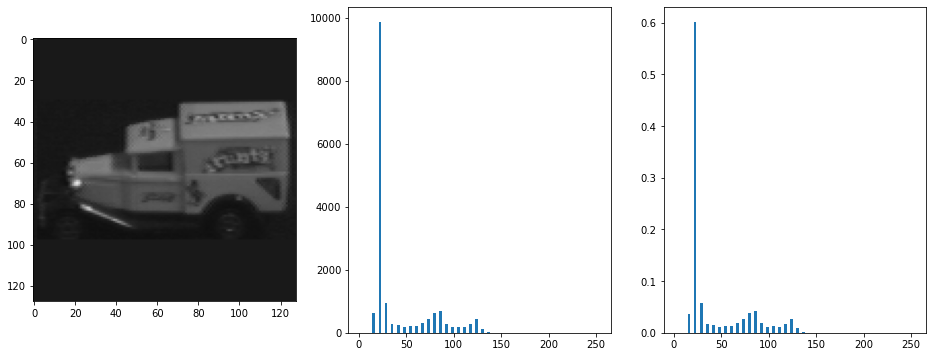

In [257]:
img_color = np.array(Image.open('model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure(1, figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(img_gray,cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1, width=3)

plt.subplot(1,3,3)
hist_gray2, bin_gray2 = normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2, width=3)
plt.show()

#### **Question: 3.2: Types of Histograms** *(2/12 Points)*
In this exercise, you must implement two histogram types: **RGB** and **RG**. 
*Note: as before, when considering RGB and RG, you should keep in mind that the range of the pixel's intensity is between $0$ and $255$*

Following, you will find an implemented version of another type of histogram, the dx/dy one. **You need to run the code for later usage without further modifications**

*Note: For the case of dx/dy histogram, the actual image value ranges depend on the chosen Gaussian filtering variance used when computing the derivative. For this exercise, set the standard deviation $σ = 3.0$ and
cap the pixel values to be in the range $[−6, 6]$.*

##### **RGB Histogram**

In [42]:
def rgb_hist(img_color_double, num_bins = 5):
    
    # Getting input shape
    x, y, c = np.shape(img_color_double)

    # Copying input image in a temp array, just in case
    img_r_g = img_color_double.copy()

    # Computing the number of the bin in which every grey-scale element will fall
    # into, using this formula https://stats.stackexchange.com/questions/236205/programmatically-calculate-which-bin-a-value-will-fall-into-for-a-histogram
    img_unadjusted_bins = (num_bins * (img_r_g - 0)) / (254 - 0)

    # The combination of the np.clip and np.ceil methods is needed to handle one
    # particular edge case
    img_adjusted_bins = np.clip(
        np.ceil(img_unadjusted_bins) - 1, 0, num_bins - 1
    ).astype(int)

    # To store the 3D histogram
    count_manual = np.zeros((num_bins, num_bins, num_bins), dtype=int)

    # Populating the 3D the histogram, by iterating over the entire picture
    for l1 in range(0, x):
        for l2 in range(0, y):
            
            # Getting the ID of the bin in which the R channel pixel value should go in
            bin_number_x = img_adjusted_bins[l1, l2, 0]
            # Getting the ID of the bin in which the G channel pixel value should go in
            bin_number_y = img_adjusted_bins[l1, l2, 1]
            # Getting the ID of the bin in which the B channel pixel value should go in
            bin_number_z = img_adjusted_bins[l1, l2, 2]
            
            # Increasing the count of bin ID got in previous instructions
            count_manual[bin_number_x, bin_number_y, bin_number_z] += 1

    # Flattening the 3D histogram
    count_manual_flattened = count_manual.flatten() 
    
    # Returning the normalized, flattened hist
    return (
        count_manual_flattened / count_manual_flattened.sum()
    )

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

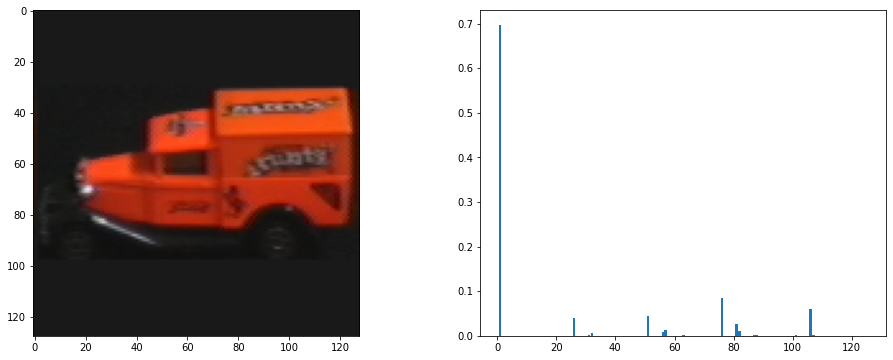

In [43]:
# Compose and test RGB histograms (rgb_hist)
plt.figure(2, figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5

plt.subplot(1,2,2)
hist_rgb1 = rgb_hist(img_color.astype('double'), num_bins_color)

plt.bar(np.array(range(1, hist_rgb1.size+1)),hist_rgb1)
plt.show()

##### **RG Histogram**

In [258]:
def rg_hist(img_color_double, num_bins = 5):
    '''
    Compute the *joint* histogram for the R and G color channels in the image
    The histogram should be normalized so that sum of all values equals 1
    Assume that values in each channel vary between 0 and 255

    img_color - input color image
    num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^2

    E.g. hists[0,9] contains the number of image_color pixels such that:
        - their R values fall in bin 0
        - their G values fall in bin 9
    '''

    # Getting input shape
    x, y, c = np.shape(img_color_double)

    # Stripping the B channel out of the original image, since it is not needed
    img_r_g = img_color_double[:, :, :2]

    # Computing the number of the bin in which every grey-scale element will fall
    # into, using this formula https://stats.stackexchange.com/questions/236205/programmatically-calculate-which-bin-a-value-will-fall-into-for-a-histogram
    img_unadjusted_bins = (num_bins * (img_r_g - 0)) / (254 - 0)

    # The combination of the np.clip and np.ceil methods is needed to handle one
    # particular edge case
    img_adjusted_bins = np.clip(
        np.ceil(img_unadjusted_bins) - 1, 0, num_bins - 1
    ).astype(int)

    # To store the 2D histogram
    count_manual = np.zeros((num_bins, num_bins), dtype=int)

    # Populating the 2D the histogram, by iterating over the entire picture
    for l1 in range(0, x):
        for l2 in range(0, y):

            # Getting the ID of the bin in which the R channel pixel value should go in
            bin_number_x = img_adjusted_bins[l1, l2, 0]
            # Getting the ID of the bin in which the G channel pixel value should go in
            bin_number_y = img_adjusted_bins[l1, l2, 1]

            # Increasing the count of bin ID got in previous instructions
            count_manual[bin_number_x, bin_number_y] += 1

    # Flattening the 2D histogram
    count_manual_flattened = count_manual.flatten() 
    
    # Returning the normalized, flattened hist
    return (
        count_manual_flattened / count_manual_flattened.sum()
    )

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

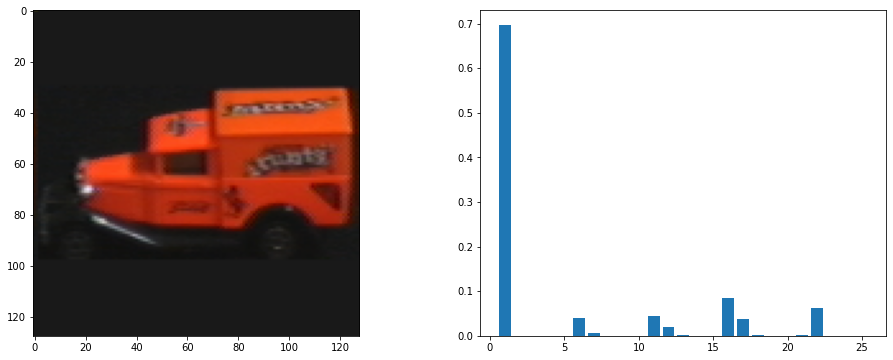

In [259]:
#Compose and test RG histograms (histogram_module.rg_hist)
plt.figure(3, figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rg = rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

##### **DX/DY Histogram** 

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [260]:
def gaussdx(sigma):
  
    rounded_sigma=math.ceil(sigma)
    filter_size = 2*3*rounded_sigma+1
    
    # Generate the index x
    zero_pos = 3*rounded_sigma # The (zero_pos+1)th element is the 0 for the index
    x=np.arange(filter_size)-zero_pos # indexes from -3*rounded_sigma to 3*rounded_sigma
        
    # Compute the Gaussian curve with std-dev sigma at the indexes x
    Dx = -x*np.exp(-x**2/(2.*sigma**2.))/(math.sqrt(2.*np.pi)*sigma**3.)

    return Dx, x

In [261]:
def gaussderiv(img, sigma):
  
    Gx, x = gauss(sigma)
    Dx, x = gaussdx(sigma)

    Gx = Gx.reshape(1, Gx.size)
    Dx = Dx.reshape(1, Dx.size)

    imgDx = conv2(conv2(img, Dx, 'same'), Gx.T, 'same')
    imgDy = conv2(conv2(img, Gx, 'same'), Dx.T, 'same')

    return imgDx, imgDy

In [354]:
def dxdy_hist(img_gray, num_bins = 5):
    '''
    Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
    Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
    The histogram should be normalized so that sum of all values equals 1

    img_gray - input gray value image
    num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2

    Note: you can use the function gaussderiv from the Filtering exercise
    '''
    
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'

    # Compute the first derivatives of img_gray
    sigma = 3.
    img_dx, img_dy = gaussderiv(img_gray, sigma)

    #Set the min_der and max_der to -6 and 6, which defines the ranges for quantization
    min_der=-6
    max_der=6

    #Flatten the 2D derivative images to 1D arrays
    img_dx=img_dx.reshape(-1)
    img_dy=img_dy.reshape(-1)

    # Clip the min and max values to min_der and max_der respectively
    # and shift minumum values to 0
    img_dx = np.clip(img_dx, min_der, max_der) + max_der
    img_dy = np.clip(img_dy, min_der, max_der) + max_der

    hists = np.zeros((num_bins, num_bins), dtype=int)
    bin_range = (max_der-min_der)/num_bins
    
    # quantize image derivative valuer into bins
    img_dx_res = np.floor(img_dx / bin_range).astype(int)
    img_dy_res = np.floor(img_dy / bin_range).astype(int)
    img_dx_res = np.clip(img_dx_res, 0, num_bins-1)
    img_dy_res = np.clip(img_dy_res, 0, num_bins-1)

    for i in range(img_dx_res.size):
        hists[img_dx_res[i], img_dy_res[i]] += 1

    hists = hists.flatten()
    hists = hists / hists.sum()
    return hists

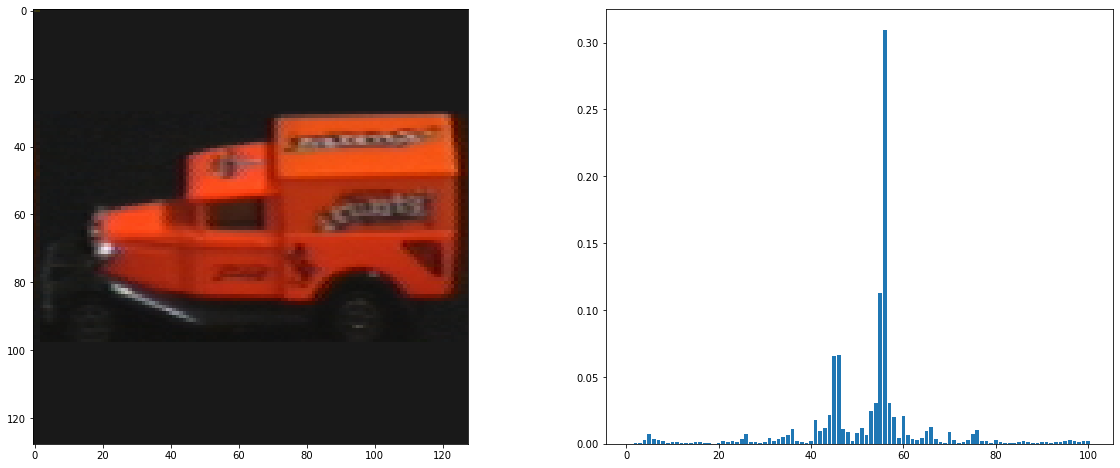

In [263]:
# Compose and test dx/dy histograms (histogram_module.dxdy_hist)

plt.figure(5)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

### **Question 3.3: Image Retrival** *(3/12 Points)*
Now that you have implemented and used different types of histograms, it's time to test how suitable they are for retrieving images in a query-by-example scenario. We will provide an additional necessary ingredient, **distance functions**. 

*Note: The distance functions will already be available to you, but you will need to use them in the best possible way.*

Implement a function called **find_best_match**, which takes a list of **model images** and a list of **query images** and returns the index of the closest model image for each query image. 
The function takes input string parameters, identifying the distance function, histogram function, and the number of histogram bins. 

*Note: See comments at the beginning of the **find_best_match** function for more details. *

Additionally to the indices of the best matching images, your implementation should also return a matrix that contains distances between all pairs of model and query images.

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

**Distance functions**


* Intersection distance function:

\begin{equation}
\bigcap(Q,V)=1-\frac{1}{2}\left(
\frac{\sum_i \min(q_i,v_i)}{\sum_i q_i} +
\frac{\sum_i \min(q_i,v_i)}{\sum_i v_i}
\right)
\end{equation}

* $L_2$ distance function:
\begin{equation}
d(Q,V)=\sqrt{\sum_i (q_i-v_i)^2}
\end{equation}

* $Chi^2$ distance function:
\begin{equation}
\chi^2(Q,V)=\sum_i \frac{(q_i-v_i)^2}{q_i + v_i}
\end{equation}


In [264]:
def dist_intersect(x,y):
  '''
  Compute the intersection distance between histograms x and y
Return 1 - hist_intersection, so smaller values correspond to more similar histograms
Check that the distance range in [0,1]
  '''

  min_sum = sum(np.minimum(x,y))
  hist_intersection = 0.5 * min_sum * ( (1/sum(x)) + (1/sum(y)) )
  
  return 1 - hist_intersection


def dist_l2(x,y):
  '''
  Compute the L2 distance between x and y histograms
  Check that the distance range in [0,sqrt(2)]
  '''
    
  l2_dist = math.sqrt(  sum( (x-y)**2. )  )
  return l2_dist


def dist_chi2(x,y):
  '''
  Compute chi2 distance between x and y
  Check that the distance range in [0,Inf]
  Add a minimum score to each cell of the histograms (e.g. 1) to avoid division by 0
  '''

  chi2_dist = sum(   ((x-y)**2.) / (x+y+1)   )
  return chi2_dist

In [265]:
def is_grayvalue_hist(hist_name):
  '''
  Handle function to discriminate when your input 
  function is in gray_scale or colors.
  '''
  if hist_name == 'grayvalue' or hist_name == 'dxdy':
    return True
  elif hist_name == 'rgb' or hist_name == 'rg':
    return False
  else:
    assert False, 'unknown histogram type'


def get_hist_by_name(img, num_bins_gray, hist_name):
  '''
  Handle function to get the correct historgam function 
  by his name.
  '''
  if hist_name == 'grayvalue':
    return normalized_hist(img, num_bins_gray)
  elif hist_name == 'rgb':
    return rgb_hist(img, num_bins_gray)
  elif hist_name == 'rg':
    return rg_hist(img, num_bins_gray)
  elif hist_name == 'dxdy':
    return dxdy_hist(img, num_bins_gray)
  else:
    assert False, 'unknown hist type: %s'%hist_name


def get_dist_by_name(x, y, dist_name):
  '''
  Handle function to get the correct distance function 
  by his name.
  '''
  if dist_name == 'chi2':
    return dist_chi2(x,y)
  elif dist_name == 'intersect':
    return dist_intersect(x,y)
  elif dist_name == 'l2':
    return dist_l2(x,y)
  elif dist_name == 'all':
    pass
  else:
    assert False, 'unknown distance: %s'%dist_name

def read_files():
  '''
  Handle function to read query and model files
  '''
  with open('model.txt') as fp:
    model_images = fp.readlines()
  model_images = [x.strip() for x in model_images]

  with open('query.txt') as fp:
    query_images = fp.readlines()
  query_images = [x.strip() for x in query_images]

  return query_images, model_images

In [267]:
# Commodity method to load some images of shape img_shape from disk
def load_images(img_paths, img_shape):

  # Getting the number of images to be loaded
  num_imgs = len(img_paths)
  
  # Creating a NDarray to store the images to be loaded
  # Its shape is gonna be: (num_images, x, y, c), where x, y and c are given in
  # input by the img_shape parameters
  imgs_np = np.zeros([num_imgs] + img_shape)
  
  for img_path, img_idx in zip(img_paths, range(0, num_imgs)):

    # Reading a single image  
    img = cv2.imread(img_path)
    
    # Converting its color scale from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Storing the image in the NDarray to be returned 
    imgs_np[img_idx, :, :, :] = img

  # Returning loaded images
  return imgs_np
  

In [269]:
# note: use functions 'get_dist_by_name', 'get_hist_by_name' and 'is_grayvalue_hist' to obtain 
#       handles to distance and histogram functions, and to find out whether histogram function 
#       expects grayvalue or color image

def compute_histograms(image_list, hist_type, hist_isgray, num_bins):
  '''
  this function returns a list containing the histograms for
  the list of images given as input.
  '''

  image_hists = list()

  for image in image_list:
    image_list.append(get_hist_by_name(image, num_bins, hist_type))
  
  return image_hists



def find_best_match(model_images, query_images, dist_type, hist_type, num_bins):
  '''
  Function to find the best match for each image in the 
  query folder.
  Input:
    model_images: list of strings with the path of model images.
    query_images: list of strings with the path of query images.
    dist_type:    a string to represent the name of the distance you want to 
                  use. Should be one among "l2", "intersect", "chi2".
    hist_type:    a string to represent the name of the histogram you want to 
                  use. Should be one among "grayvalue", "rgb", "0", "dxdy".
  
  Output:
    best_match:   list containing in each position the index of the retrieved
                  best matching image.
    D:            Matrix with |model_images| rows and |query_images| columns
                  containing the scores of each matching.
  '''

  # Loading model and query images into an array
  model_images_np = load_images(model_images, [128, 128, 3])
  query_images_np = load_images(query_images, [128, 128, 3])

  # Getting the number of model and query images
  num_model_images = model_images_np.shape[0]
  num_query_images = query_images_np.shape[0]

  # Computing the expected number of bins in the histogram, according to 
  # the type of histogram that the method will use and the number of bins, as
  # explained in the provided method signatures for the various histogram methods
  exponent_dict = {
    "grayvalue": 1,
    "rgb": 3,
    "rg": 2,
    "dxdy": 1
  }
  actual_num_bins = num_bins ** exponent_dict[hist_type]
  
  # NDarrays to store histograms of the model and qquery images
  model_images_hists = np.zeros((num_model_images, actual_num_bins))
  query_images_hists = np.zeros((num_query_images, actual_num_bins))

  for m, m_idx in zip(model_images_np, range(0, num_model_images)):

    # Computing and storing the hisogram for all the model images    
    model_images_hists[m_idx, :] = get_hist_by_name(m, num_bins, hist_type)

  for q, q_idx in zip(query_images_np, range(0, num_query_images)):
    
    # Computing and storing the hisogram for all the query images
    query_images_hists[q_idx, :] = get_hist_by_name(q, num_bins, hist_type)

  # Creating the distance matrix, as requested
  D = np.zeros((num_model_images, num_query_images))

  # Populating the entire distance matrix with the distances between all the 
  # possible model and query images
  for m, m_idx in zip(model_images_hists, range(0, num_model_images)):
    
    for q, q_idx in zip(query_images_hists, range(0, num_query_images)):
      
      dist_value = get_dist_by_name(m, q, dist_type)
      
      D[m_idx, q_idx] = dist_value
   
  # For every query image, getting the smaller distance from the model images
  # The matrix has shape (num_model_images, num_query_images), so, the reduction
  # operation must "compress" along the 0 axis
  best_match = np.argmin(D, axis=0)

  # Returning the best matches and the distance matrix
  return best_match, D

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [332]:
# model_images - list of file names of model images
# query_images - list of file names of query images

query_images, model_images = read_files()

# query_images.sort()
# model_images.sort()

# print(model_images)
# print(query_images)

# query_images = ["./query/obj4__40.png"]
# model_images = ["./model/obj4__0.png", "./model/obj100__0.png", "./model/obj63__0.png", "./model/obj49__0.png", "./model/obj47__0.png", "./model/obj50__0.png"]

dist_type = 'chi2'
# dist_type = 'l2'
hist_type = 'rg'
# hist_type = 'rg'
num_bins = 255

[best_match, D] = find_best_match(
    model_images, query_images, dist_type, hist_type, num_bins)

print("Indexes of correct retrieved images is:\n ", *np.where(best_match == np.arange(len(query_images))))

print("The Recognition rate is", sum(best_match == np.arange(len(query_images)))/len(query_images))

Indexes of correct retrieved images is:
  [ 9 10 17 19 23 26 28 29 38 42 44 45 46 59 60 70 71 74 75 79 81 82 83]
The Recognition rate is 0.25842696629213485


### **Question 3.4: Closest Neighbours** *(3/12 Points)*

Implement a function **show_neighbors**, which inputs a list of **model images** and a list of **query images**.  For each **query image**, the function has to output a visualization of **5 model images** which are most similar to the query image according to the specified distance metric. 

*Note: use the function **find_best_match**. See the Figure below for an example of the output.*

![](https://drive.google.com/uc?export=view&id=1qlPbNzh92u9EU4kzNMbHg0uRgSk4AnRO)


In [271]:
def show_neighbors(model_images, query_images, dist_type, hist_type, num_bins):
  '''
  For each image file from 'query_images' find and visualize the 5 nearest images from 'model_image'.

  Note: use the previously implemented function 'find_best_match'
  Note: use subplot command to show all the images in the same Python figure, one row per query image
  
  '''

  # Number of desired nearest neighbours to show in the plot
  k = 5
  
  # Getting the distance matrix and the best matching image, for every query image
  best_match, D = find_best_match(
    model_images, query_images, dist_type, hist_type, num_bins
  )

  # Sorting the distance matrix along the 0 axis, since every j-th column stores
  # the distances between the querry image j and all the possible model images
  distances_sorted = np.sort(D, axis=0)

  # Trimming the distance matrix to get only the top-k distances
  distances_sorted_top_k = distances_sorted[:k, :]

  # (k, num_query_images)-shaped array to store the indexes of the closest neighbours
  matrix = np.zeros((k, len(query_images)), dtype=int)
  
  # Populating the index matrix
  for distance_row, x in zip(distances_sorted_top_k, range(0, D.shape[0])):
    
    for distance_col, y in zip(distance_row, range(0, D.shape[1])):
      
      # Finding the index of the image that actually results in the specific
      # distance
      matrix[x][y] = np.where(np.isclose(D[:, y], distance_col))[0][0]
  
  matrix = matrix.T
  
  # For every query image
  for q, q_idx in zip(query_images, range(len(query_images))):
    
    # Defining the location in the plotting space that will host the query image
    ax1 = plt.subplot(q_idx + 1, k + 1, 1)
    
    # Setting the title as per specs
    ax1.set_title(
      f"Q{q_idx +1 }", fontweight ="bold", fontsize = 14
    )

    # Plotting the query image
    plt.sca(ax1)
    plt.imshow(plt.imread(q))
    plt.axis('off')

    # For every nearest neighbour
    for q_similar_idx, i in zip(matrix[q_idx, :], range(k)):
      
      # Defining the location in the plotting space that will host the nearest neighbour image
      ax_i = plt.subplot(q_idx + 1, k + 1, i + 2)

      # Setting the title as per specs
      ax_i.set_title(
        f"M {np.round(distances_sorted_top_k[i][q_idx], 2)}",
        fontweight ="bold", fontsize = 14
      )
      
      # Plotting nearest neighbour
      plt.sca(ax_i)
      plt.imshow(plt.imread(model_images[q_similar_idx]))
      plt.axis('off')

    plt.show()

  return matrix

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [ ]:
## visualize nearest neighbors
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)

### **#2 Report** *(2/12 Points)*

Experiment with different functions and numbers of histogram bins, and find a combination that works best. **Submit the summary of your experiments in a report as part of your solution.**


In [361]:
from tqdm import notebook
import datetime

dist_types = ["intersect", "l2", "chi2"]

hist_types = ["rgb", "rg", "grayvalues"]

step_amount = 5

num_bins_dict = {
  "rgb": range(0, 60),
  "rg": range(5, 260, step_amount),
  "grayvalues": range(5, 260, step_amount),
  "dxdy": range(5, 260, step_amount),
}

experiments_dict = []

for distance_name in notebook.tqdm(
  dist_types, desc=("Distance name: " + distance_name)
):

  for histogram_name in notebook.tqdm(
    ["rg"], desc=("Histogram name: " + histogram_name)
  ):
  
    for num_bins in notebook.tqdm(
      num_bins_dict[histogram_name], 
      desc="Number of bins: from " + str(
        num_bins_dict[histogram_name][0]
      ) + " to " + str(num_bins_dict[histogram_name][-1]) + ", with step " + str(step_amount)
    ):

      [best_match, D] = find_best_match(
        model_images, query_images, distance_name, histogram_name, num_bins
      )

      accuracy = sum(
        best_match == np.arange(len(query_images))
      ) / len(query_images)

      experiments_dict.append(
        {
          "distance_name": distance_name,
          "histogram_name": histogram_name,
          "num_bins": num_bins,
          "accuracy": accuracy
        }
      )

    experiments_df = pd.DataFrame(experiments_dict)

    timestamp = datetime.datetime.now()
    experiments_df.to_csv("./experiments_dataframes_dumps/" + str(timestamp) + "_CHECKPOINT_.csv")
    experiments_df.to_markdown("./experiments_dataframes_dumps/" + str(timestamp) + "_CHECKPOINT_.md")
  
  experiments_df = pd.DataFrame(experiments_dict)
    
  timestamp = datetime.datetime.now()
  experiments_df.to_csv("./experiments_dataframes_dumps/" + str(timestamp) + "_CHECKPOINT_.csv")
  experiments_df.to_markdown("./experiments_dataframes_dumps/" + str(timestamp) + "_CHECKPOINT_.md")


experiments_df = pd.DataFrame(experiments_dict)

timestamp = datetime.datetime.now()
experiments_df.to_csv("./experiments_dataframes_dumps/" + str(timestamp) + "_FINAL_.csv")
experiments_df.to_markdown("./experiments_dataframes_dumps/" + str(timestamp) + "_FINAL_.md")




Distance name: intersect:   0%|          | 0/3 [00:00<?, ?it/s]

Histogram name: rg:   0%|          | 0/1 [00:00<?, ?it/s]

Number of bins: from 5 to 255:   0%|          | 0/51 [00:00<?, ?it/s]

----------------------------

**Fill the table below**

----------------------------

Hist type = RGB

|  | Number of Bins | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1  | 5  | intersect | 0.77 |
| 2  | 10 | intersect | 0.78 |
| 3  | 15 | intersect | 0.87 |
| 4  | 20 | intersect | 0.79 |
| 5  | 25 | intersect | 0.91 |
| 6  | 30 | intersect | 0.80 |
| 7  | 35 | intersect | 0.89 |
| 8  | 40 | intersect | 0.78 |
| 9  | 45 | intersect | 0.87 |
| 10 | 50 | intersect | 0.78 |
| 12 | 55 | intersect | 0.87 |
| 13 | 60 | intersect | 0.77 |
| 14 | 5  | l2        | 0.64 |
| 15 | 10 | l2        | 0.60 |
| 16 | 15 | l2        | 0.57 |
| 17 | 20 | l2        | 0.48 |
| 18 | 25 | l2        | 0.48 |
| 19 | 30 | l2        | 0.38 |
| 20 | 35 | l2        | 0.47 |
| 21 | 40 | l2        | 0.33 |
| 22 | 45 | l2        | 0.38 |
| 23 | 50 | l2        | 0.35 |
| 24 | 55 | l2        | 0.34 |
| 25 | 60 | l2        | 0.32 |
| 25 | 5  | chi2      | 0.68 |
| 25 | 10 | chi2      | 0.67 |
| 25 | 15 | chi2      | 0.65 |
| 25 | 20 | chi2      | 0.55 |
| 25 | 25 | chi2      | 0.52 |
| 25 | 30 | chi2      | 0.43 |
| 25 | 35 | chi2      | 0.50 |
| 25 | 40 | chi2      | 0.37 |
| 25 | 45 | chi2      | 0.44 |
| 25 | 50 | chi2      | 0.32 |
| 25 | 55 | chi2      | 0.38 |
| 25 | 60 | chi2      | 0.34 |



Hist type = RG

|  | Number of Bins | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1  | 5   | intersect | 0.70 |
| 2  | 10  | intersect | 0.70 |
| 3  | 15  | intersect | 0.83 |
| 4  | 20  | intersect | 0.73 |
| 5  | 25  | intersect | 0.84 |
| 6  | 30  | intersect | 0.74 |
| 7  | 35  | intersect | 0.84 |
| 8  | 40  | intersect | 0.74 |
| 9  | 45  | intersect | 0.82 |
| 10 | 50  | intersect | 0.73 |
| 12 | 55  | intersect | 0.80 |
| 13 | 60  | intersect | 0.71 |
| 13 | 65  | intersect | 0.80 |
| 13 | 70  | intersect | 0.73 |
| 13 | 75  | intersect | 0.78 |
| 13 | 80  | intersect | 0.68 |
| 13 | 85  | intersect | 0.80 |
| 13 | 90  | intersect | 0.68 |
| 13 | 95  | intersect | 0.79 |
| 13 | 100 | intersect | 0.68 |
| 14 | 5   | l2        | 0.61 |
| 15 | 10  | l2        | 0.58 |
| 16 | 15  | l2        | 0.58 |
| 17 | 20  | l2        | 0.48 |
| 18 | 25  | l2        | 0.53 |
| 19 | 30  | l2        | 0.43 |
| 20 | 35  | l2        | 0.32 |
| 21 | 40  | l2        | 0.34 |
| 22 | 45  | l2        | 0.37 |
| 23 | 50  | l2        | 0.39 |
| 24 | 55  | l2        | 0.39 |
| 25 | 60  | l2        | 0.36 |
| 25 | 65  | l2        | 0.34 |
| 25 | 70  | l2        | 0.31 |
| 25 | 75  | l2        | 0.39 |
| 25 | 80  | l2        | 0.34 |
| 25 | 85  | l2        | 0.37 |
| 25 | 90  | l2        | 0.33 |
| 25 | 95  | l2        | 0.34 |
| 25 | 100 | l2        | 0.33 |
| 25 | 5   | chi2      | 0.65 |
| 25 | 10  | chi2      | 0.59 |
| 25 | 15  | chi2      | 0.62 |
| 25 | 20  | chi2      | 0.57 |
| 25 | 25  | chi2      | 0.59 |
| 25 | 30  | chi2      | 0.47 |
| 25 | 35  | chi2      | 0.60 |
| 25 | 40  | chi2      | 0.44 |
| 25 | 45  | chi2      | 0.52 |
| 25 | 50  | chi2      | 0.39 |
| 25 | 55  | chi2      | 0.44 |
| 25 | 60  | chi2      | 0.38 |
| 25 | 65  | chi2      | 0.41 |
| 25 | 70  | chi2      | 0.33 |
| 25 | 75  | chi2      | 0.41 |
| 25 | 80  | chi2      | 0.37 |
| 25 | 85  | chi2      | 0.38 |
| 25 | 90  | chi2      | 0.35 |
| 25 | 95  | chi2      | 0.35 |
| 25 | 100  | chi2      | 0.32 |
| 25 | 105  | chi2      | 0.35 |




## ***Bonus* Question 4: Performance Evaluation** *(5 Points)*

In this bonus question, your goal is to **implement different types of metrics** to evaluate the performance of a binary classificator.

For the purpose of this exercise you don't need to know the inner workings of the ML model, therefore imagine to have a black box model that estimates the probability of an event occurring, such as the sky being clear or not, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In order to compute a performance score (e.g., accuracy), you need to compare your predictions with the true values. So you need to convert the predicted probabilities into 0s and 1s by means of a threshold.

What you have to do is the following:
- **compute the performance** of the model with all the possible tresholds in the interval \[0.0, 1.0\] with increments of 0.5
- **analyze** how the metrics vary at different thresholds and **write a report** on your analysis

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

### **Question 4.1: Performance Evaluation** *(3/5 Points)*

Write the code to compute the metrics for performance evaluation, then run the provided code cell to check if your results are correct.

In [58]:
#####################################################
##    RUN THIS CELL WITHOUT CHANGING THE CODE      ##
#####################################################

data = pd.read_csv('./ionosphere.data', header=None) 
X = data[data.columns[:34]]
y = data[data.columns[-1]]
y = np.array([0 if value == 'b' else 1 for value in y])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:,1]

In [59]:
def true_positives(y_true, y_pred):
  return ((y_pred == 1) & (y_true == 1))

def num_true_positives(y_true, y_pred): 
  return true_positives(y_true, y_pred).sum()

def false_positives(y_true, y_pred):
  return ((y_pred == 1) & (y_true == 0))

def num_false_positives(y_true, y_pred):
  return false_positives(y_true, y_pred).sum()

def true_negatives(y_true, y_pred):
  return ((y_pred == 0) & (y_true == 0))

def num_true_negatives(y_true, y_pred):
  return true_negatives(y_true, y_pred).sum()

def false_negatives(y_true, y_pred):
  return ((y_pred == 0) & (y_true == 1))

def num_false_negatives(y_true, y_pred):
  return false_negatives(y_true, y_pred).sum()

In [60]:
def true_positive_rate(y_true, y_pred):
  num_true_pos = num_true_positives(y_true, y_pred)

  return num_true_pos / (num_true_pos + num_false_negatives(y_true, y_pred)) 

def sensitivity(y_true, y_pred):
  return true_positive_rate(y_true, y_pred)

In [61]:
def false_positive_rate(y_true, y_pred):
  false_pos = num_false_positives(y_true, y_pred)
  
  return false_pos / (false_pos + num_true_negatives(y_true, y_pred))

In [62]:
def my_accuracy_score(y_true, y_pred):

    preds_match = y_true == y_pred

    correct_preds = preds_match.sum()

    tot_num_preds = y_true.size
    
    return correct_preds / tot_num_preds

In [63]:
def my_precision_score(y_true, y_pred):

    num_true_pos = num_true_positives(y_true, y_pred)

    return num_true_pos / (num_true_pos + num_false_positives(y_true, y_pred))

In [64]:
def my_recall_score(y_true, y_pred):

    num_true_pos = num_true_positives(y_true, y_pred)

    return num_true_pos / (num_true_pos + num_false_negatives(y_true, y_pred))

In [65]:
def my_f1_score(y_true, y_pred):
    
    precision = my_precision_score(y_true, y_pred)
    recall = my_recall_score(y_true, y_pred)

    return (2 * precision * recall) / (precision + recall)

In [66]:
def my_confusion_matrix(y_true, y_pred):

    matrix = [
        [
            num_true_negatives(y_true, y_pred) , 
            num_false_positives(y_true, y_pred)
        ],
        [
            num_false_negatives(y_true, y_pred), 
            num_true_positives(y_true, y_pred)
        ],
    ]

    return np.array(matrix, dtype=np.int64)

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [67]:
# CHECK IF YOUR METRICS ARE CORRECT BY RUNNING THIS CODE CELL

def compare_metric(my_metric_fun, metric_fun, y_test, preds):
    try:
        if my_metric_fun.__name__ != 'my_confusion_matrix':
            assert round(my_metric_fun(y_test, preds), 4) == round(metric_fun(y_test, preds), 4)
        else:
            assert np.array_equal(my_metric_fun(y_test, preds), metric_fun(y_test, preds))
        print(f"{my_metric_fun.__name__} is correct")
    except:
        print(f"{my_metric_fun.__name__} is wrong")
        # TODO REMOVE THIS DEBUG CODE!!
        try:
            print("my:     ", round(my_metric_fun(y_test, preds), 4))
            print("theirs: ", round(metric_fun(y_test, preds), 4))
        except:
            print("my:     ", my_metric_fun(y_test, preds), 4)
            print("theirs: ", metric_fun(y_test, preds), 4)

preds = np.array([0 if p < 0.5 else 1 for p in y_pred])
compare_metric(my_accuracy_score, accuracy_score, y_test, preds)
compare_metric(my_precision_score, precision_score, y_test, preds)
compare_metric(my_recall_score, recall_score, y_test, preds)
compare_metric(my_f1_score, f1_score, y_test, preds)
compare_metric(my_confusion_matrix, confusion_matrix, y_test, preds)

my_accuracy_score is correct
my_precision_score is correct
my_recall_score is correct
my_f1_score is correct
my_confusion_matrix is correct


### **Question 4.2: Analysis and Report** *(2/5 Points)*

Write the code to compute the metrics all the possible tresholds in the interval (0.0, 1.0) with increments of 0.5.  
Ideally, you should put everything into a pandas DataFrame and print it for a better visualization.  
Then, write a report analyzing you your results. You have complete freedom on your analysis.

Imagine also to be in a medical scenario where your model is predicting the presence or not of a desease and try to answer to the following questions:
- What is the real life trade-off between high precision and high recall? What would you choose?
- Why isn't the accuracy an appropriate measure in such scenario?

#### **4.2.1: Gathering data** ####

We will kick this section off by gathering all the data that will be then commented in the upcoming sub-sections.

We want to store metric (accuracy, precision, recall and F-1) values computed across all the requested thresholds.
See code comments for the precise structure of the Pandas DataFrame. 

In [68]:
# Make sure to run previous cell, in order to have the y_pred and y_test variables correctly populated!

thresholds = np.round(np.linspace(0.0, 1.0, int((1.0 - 0.0) / 0.05 + 1))[1:-1], 2)

d = []

for threshold in thresholds:

  preds = np.array([0 if p < threshold else 1 for p in y_pred])

  d.append(
    {
      "threshold": threshold,
      "preds": preds,
      "accuracy": my_accuracy_score(y_test, preds),
      "precision": my_precision_score(y_test, preds),
      "recall": my_recall_score(y_test, preds),
      "f1": my_f1_score(y_test, preds),
      "true_positive_rate": true_positive_rate(y_test, preds),
      "false_positive_rate": false_positive_rate(y_test, preds)

    }
  )

df = pd.DataFrame(d)

print(df)

    threshold                                              preds  accuracy  \
0        0.05  [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...  0.727273   
1        0.10  [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...  0.772727   
2        0.15  [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...  0.784091   
3        0.20  [1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...  0.806818   
4        0.25  [1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...  0.829545   
5        0.30  [1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...  0.863636   
6        0.35  [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...  0.875000   
7        0.40  [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...  0.897727   
8        0.45  [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...  0.909091   
9        0.50  [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...  0.909091   
10       0.55  [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...  0.909091   
11       0.60  [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...

#### **4.2.2: Visualizing gathered data** ####

Requested metrics (accuracy, precision, recall and F-1 scores) across all required thresholds will be plotted

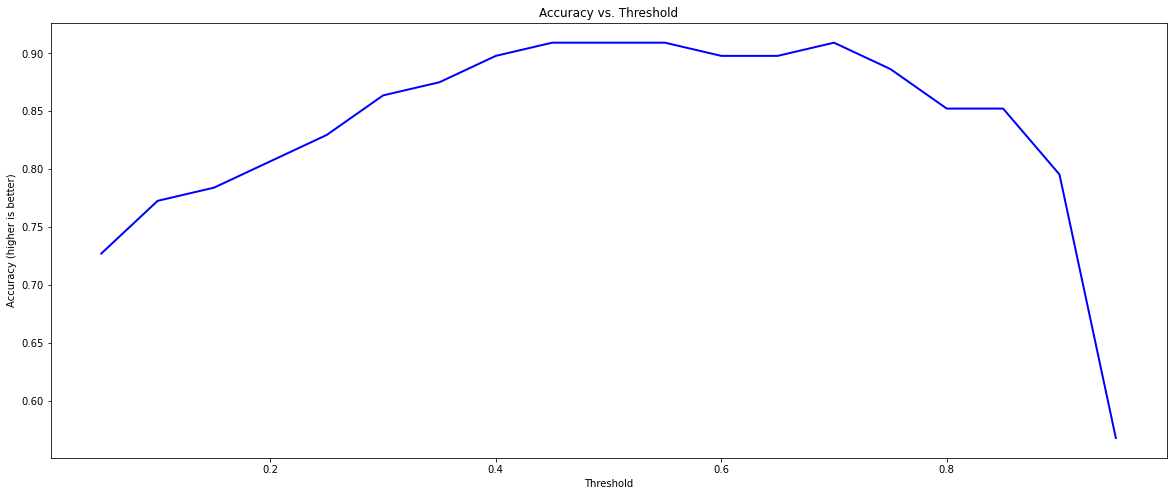

In [69]:
fig, ax = plt.subplots()

ax.plot(df["threshold"], df["accuracy"], linewidth=2.0, color="blue")
ax.set_xlabel("Threshold")
ax.set_ylabel("Accuracy (higher is better)")
ax.set_title("Accuracy vs. Threshold")

plt.show()


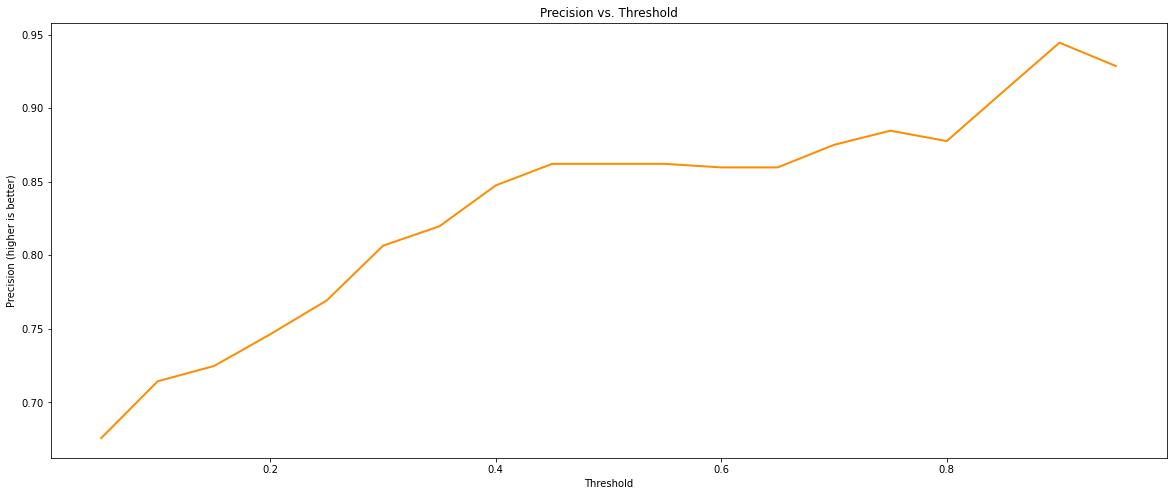

In [70]:
fig, ax = plt.subplots()

ax.plot(df["threshold"], df["precision"], linewidth=2.0, color="darkorange")
ax.set_xlabel("Threshold")
ax.set_ylabel("Precision (higher is better)")
ax.set_title("Precision vs. Threshold")

plt.show()


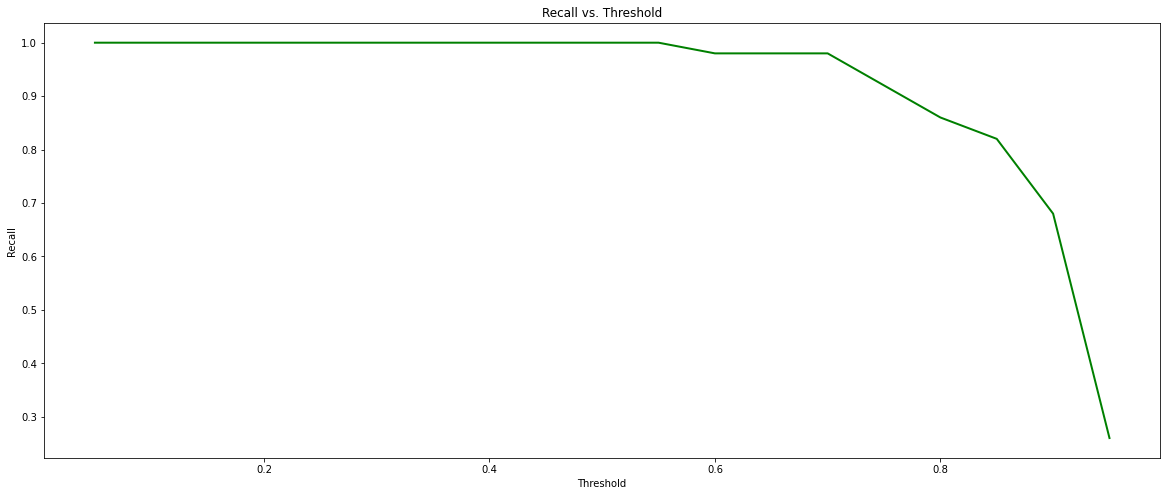

In [71]:
fig, ax = plt.subplots()

ax.plot(df["threshold"], df["recall"], linewidth=2.0, color="green")
ax.set_xlabel("Threshold")
ax.set_ylabel("Recall")
ax.set_title("Recall vs. Threshold")

plt.show()


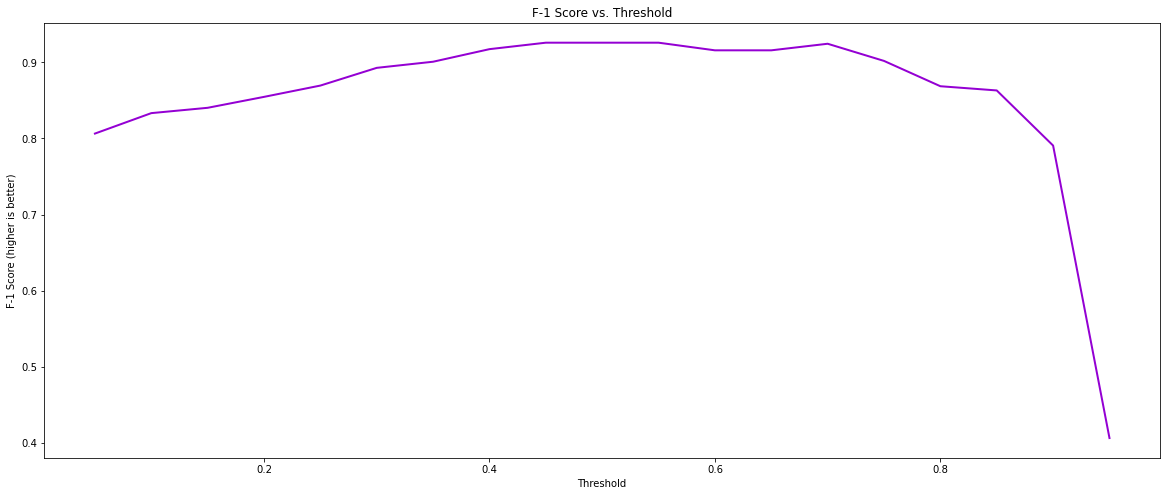

In [72]:
fig, ax = plt.subplots()

ax.plot(df["threshold"], df["f1"], linewidth=2.0, color="darkviolet")
ax.set_xlabel("Threshold")
ax.set_ylabel("F-1 Score (higher is better)")
ax.set_title("F-1 Score vs. Threshold")

plt.show()


**TODO** comment these plots

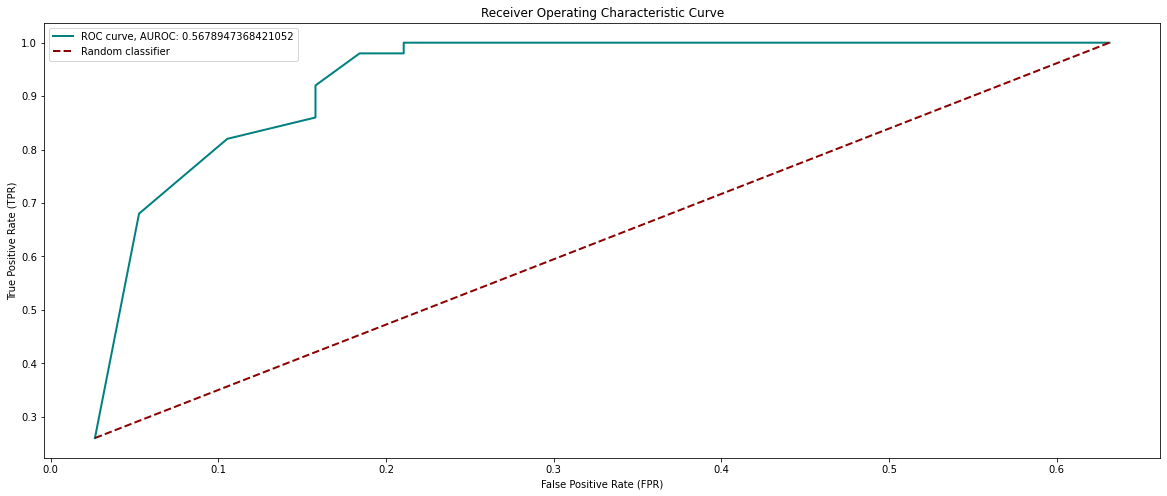

In [73]:
auroc_sklearn = sklearn.metrics.auc(df["false_positive_rate"],df["true_positive_rate"])
auroc_np = np.trapz(y=df["true_positive_rate"], x=df["false_positive_rate"])

fig, ax = plt.subplots()

ax.plot(
    df["false_positive_rate"], df["true_positive_rate"], 
    linewidth=2.0, color="teal",
    label=f"ROC curve, AUROC: {np.abs(auroc_np)}"
)

random_classifier_x = [
    min(df["false_positive_rate"]), 
    max(df["false_positive_rate"])
]
random_classifier_y = [
    min(df["true_positive_rate"]), 
    max(df["true_positive_rate"])
]

ax.plot(
    random_classifier_x, random_classifier_y,
    linewidth=2.0, color="darkred",
    label="Random classifier",
    linestyle="dashed"
)
ax.set_xlabel("False Positive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
ax.set_title("Receiver Operating Characteristic Curve")

ax.legend()
plt.show()


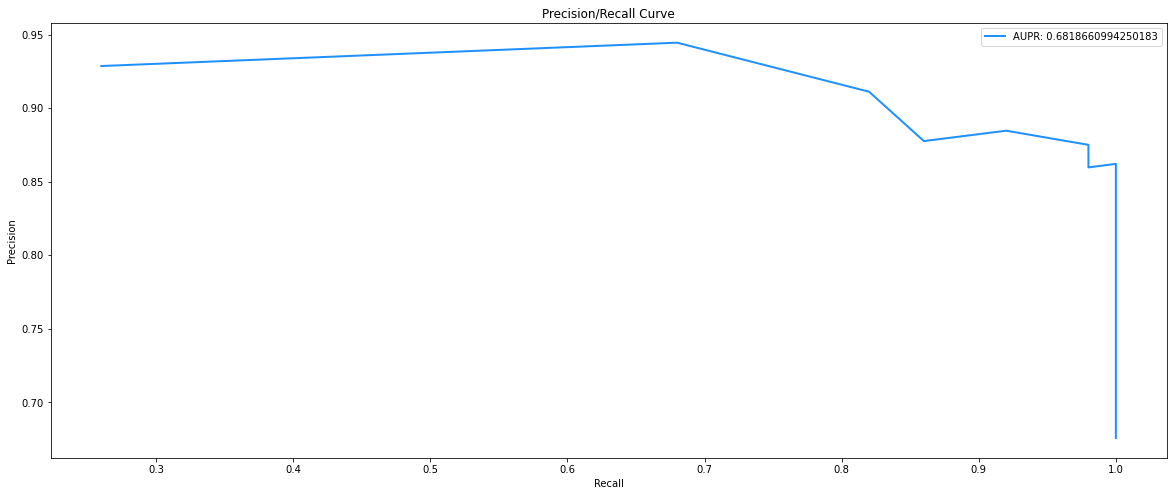

In [74]:
aupr_sklearn = sklearn.metrics.auc(df["recall"],df["precision"])
aupr_np = np.trapz(y=df["precision"], x=df["recall"])

fig, ax = plt.subplots()

ax.plot(
    df["recall"], df["precision"], 
    linewidth=2.0, color="dodgerblue",
    label=f"AUPR: {np.abs(aupr_np)}"
)
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision/Recall Curve")

ax.legend()
plt.show()

#### **What is the real life trade-off between high precision and high recall?** ####

Let's suppose a binary **classification** problem that must be solved using **Machine Learning**.

By comparing our predictions against the labelled data (we are in a supervised context), we can compute how many **True Positive**, **True Negative**, **False Negative** and **False Positive** predictions our model outputs. <br>
A True Positive or Negative happens when we predict the same label as the ground truth. <br>
A False Positive happens when we predict Positive, but the ground truth was actually Negative. <br>
Similarly, we have a False Negative when the model outputs Negative, but the ground truth is Positive.

Once these information has been computed, it can be assembled in a visual representation, called the **Confusion Matrix**. <br>
Starting from the Confusion Matrix, it is possible to compute more advanced metrics, including **Precision** and **Recall**.

Precision can be computed as $\text{Precision} = \dfrac{\text{True Positives}}{\text{True Positives + False Positives}}$.<br>
It shows how many samples were actual positives, among all the samples that the model has labeled as positives (i.e. how precise the classification has been).


Recall can be computed as $\text{Recall} = \dfrac{\text{True Positives}}{\text{True Positives + False Negatives}}$.<br>
It shows how many actually positive samples were predicted, among all the possible positive samples.

Due to their formulations, Precision and Recall react in different ways to changes applied to the thresholding value.<br>
The higher the threshold, the higher the precision, whilst the lower the threshold, the higher the recall.<br>
If we want high precision, we will have to use a high threshold, which then would cause a lower recall.<br>
If we decide to prioritize recall, we will need to lower the threshold, which would then result in lower precision.<br>

At the end of the day, this is the real life trade-off between these two metrics.<br>
There is no right or wrong setting, it's all about production environment constraints.<br>
Ideally, one should understand which of the two characteristics is more important, in order to then devise a model that can be tuned to have higher performances according to the selected metric.<br>







#### **Waht would you choose?** ####

Looking at the formula, it can be observed that the Precision value depends entirely on the positive predictions.<br>
On the contrary, the Recall is impacted by the number of False Negatives too.<br>
As a consequence, whenever we need a very high confidence on a positive prediction, Precision is the metric to use.<br>
Otherwise, whenever the model should spot as many potential positives as possible, Recall is the go to metric to focus on<br>

In a medical setting, Recall is the most appropriate metric to take into consideration, because we want to spot as much potential positives as possible.<br>
Basically, we want as few False Negatives as possible.<br>

As stated in class, it would be better to classify a healty person as having a illness (*false positive*),rather than classifying a ill person as healty (*false negative*).<br>
In the first case, since follow-up tests can always be performed. <br>
The latter case could lead to potentially life-threatening situations.<br>




#### **Why isn't the accuracy an appropriate measure in such scenario?** ####

Observing the formula of the Accuracy metric, we can spot at least two issue with its adoption in a medical field: $\text{Accuracy} = \dfrac{\text{True Positives + True Negatives}}{\text{Total number of predictions}}$.<br>
 
First, Accuracy is heavily influenced by balancement of the dataset: in case of unbalanced datasets (common in healthcare scenarios), always predicting the majority class would result in a high accuracy, effectively fooling the evaluation process of the model.

Second, Accuracy does not directly take into consideration False Negatives, which, as stated above, is the metric we're after.